<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 150px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>To Grant or Not to Grant</center></div> <br>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Machine Learning Project 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Group 42:</center></div>
   <div><center> Eden da Silva | 20240740 </center></div>
   <div><center> José Cavaco | 20240513 </center></div>
   <div><center> Luana Rocha | 20240111 </center></div>
   <div><center> Maria Radix | 20240687 </center></div>
   <div><center> Tiago Castilho | 20240489 </center></div>

# Notebook 3: Feature Engineering
# Index

* [3.0. Imports](#imp)

  
* [3.1. Feature Enginneering](#feat)
  * [3.1.1. WCIO Codes and Descriptions](#WCIO)
    * [3.1.1.1 WCIO Cause of Injury](#cause)
    * [3.1.1.2 WCIO Nature of Injury](#nature)
    * [3.1.1.3 WCIO Part of Body](#body)
  * [3.2. Difference in data Features](#diff)
    * [3.2.1 Accident Date to Assembly Date](#acc_ass)
    * [3.2.2 Accident Date to C-2 Date](#acc_c2)
    * [3.2.3 Age Group](#ages)
    * [3.2.4 Accident Season](#seasons)
    * [3.2.5 Is Weekend](#wknd)
    * [3.2.6 Age Wage Interaction](#age_wage)
  * [3.3 Date Feature dataypes](#date_dtype)
  * [3.4 Numerical Transformation of Skewed Features: Logarithmic Transformation](#transform)
  * [3.5 CSV Formatting, Exports](#export)
 

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="imp">
    
# **3.0. Imports**
 
</a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [6]:
#importing the data frames from the previous notebook (02_preprocessing)
df_train_preprocess = pd.read_csv('df_train_preprocess.csv', low_memory = False, index_col = 0)
df_val_preprocess = pd.read_csv('df_val_preprocess.csv', low_memory = False, index_col = 0)
df_test_preprocess = pd.read_csv('df_test_preprocess.csv', low_memory = False, index_col = 0)

In [7]:
df_train_fe = df_train_preprocess.copy()
df_val_fe = df_val_preprocess.copy()
df_test_fe = df_test_preprocess.copy()

In [9]:
X_train = df_train_fe.drop('Claim Injury Type', axis = 1)
X_val = df_val_fe.drop('Claim Injury Type', axis = 1)
y_train = df_train_fe['Claim Injury Type']
y_val = df_val_fe['Claim Injury Type']

In [10]:
#examing the top of the dataframes to ensure everything imported correctly
X_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5785935,2021-08-05,49.0,0,2021-08-10,1,744.06,1971.0,2021-08-10 00:00:00.000000000,1,PROPERTY AND CASUALTY,...,MANUFACTURING,4,29.0,ON SAME LEVEL,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",42.0,LOWER BACK AREA,6.0,1
6090033,2022-09-14,56.0,0,2022-09-21,1,845.29,1966.0,2022-09-21 00:00:00.000000000,1,EVEREST PREMIER INSURANCE,...,TRANSPORTATION AND WAREHOUSING,4,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,52.0,STRAIN OR TEAR,25.0,SOFT TISSUE,5.0,1
6136197,2022-11-07,48.0,0,2022-11-18,0,1070.12,1974.0,2022-11-18 00:00:00.000000000,0,CHARTER OAK FIRE INS CO,...,TRANSPORTATION AND WAREHOUSING,3,68.0,STATIONARY OBJECT,10.0,CONTUSION,12.0,BRAIN,2.0,0
6019545,2020-09-02,55.0,0,2022-06-21,0,1070.12,1965.0,2022-06-21 00:00:00.000000000,1,NEW HAMPSHIRE INSURANCE CO,...,CONSTRUCTION,0,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,2.0,0
5792247,2021-08-13,53.0,0,2021-08-18,1,668.08,1968.0,2021-08-18 00:00:00.000000000,1,STATE INSURANCE FUND,...,RETAIL TRADE,1,29.0,ON SAME LEVEL,10.0,CONTUSION,18.0,SOFT TISSUE,6.0,1


In [11]:
X_val.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5947783,2022-03-14,51.0,0,2022-03-22,0,1070.12,1970.0,2022-03-22 00:00:00.000000000,1,CANTON CENTRAL SCHOOL DISTRICT,...,EDUCATIONAL SERVICES,1,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,-9.0,MULTIPLE,2.0,0
6150876,2022-12-02,61.0,0,2022-12-09,1,1070.12,1961.0,2022-12-09 00:00:00.000000000,0,STATE INSURANCE FUND,...,TRANSPORTATION AND WAREHOUSING,1,56.0,LIFTING,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),2.0,1
5397365,2011-06-14,50.0,0,2020-01-08,1,1070.12,1961.0,2020-01-07 00:00:00.000000000,0,COMMERCE AND INDUSTRY INS CO,...,HEALTH CARE AND SOCIAL ASSISTANCE,4,25.0,FROM DIFFERENT LEVEL (ELEVATION),49.0,SPRAIN OR TEAR,55.0,ANKLE,1.0,0
6077399,2022-02-07,54.0,0,2022-09-07,1,1502.50,1967.0,2022-09-13 00:00:00.000000000,1,STATE INSURANCE FUND,...,HEALTH CARE AND SOCIAL ASSISTANCE,4,32.0,ON ICE OR SNOW,10.0,CONTUSION,-9.0,MULTIPLE,0.0,1
5945251,2022-03-15,35.0,0,2022-03-16,0,1070.12,1986.0,2022-03-16 00:00:00.000000000,0,SAFETY NATIONAL CASUALTY CORP,...,HEALTH CARE AND SOCIAL ASSISTANCE,4,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,41.0,UPPER BACK AREA,0.0,0


In [12]:
df_test_fe.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Number of Dependents,Non-Zero Wage
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,0,2023-01-02,0,1070.12,2003.0,2023-01-02 00:00:00.000000000,0,INDEMNITY INSURANCE CO OF,...,TRANSPORTATION AND WAREHOUSING,4,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,1,1
6166141,2022-11-20,19,0,2023-01-02,0,1070.12,2003.0,2023-01-02 00:00:00.000000000,0,A I U INSURANCE COMPANY,...,RETAIL TRADE,4,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,1,1
6165907,2022-12-26,59,0,2023-01-02,0,1070.12,1963.0,2022-12-31 00:00:00.000000000,0,AMGUARD INSURANCE COMPANY,...,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,3,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,0,0
6166047,2022-12-28,55,0,2023-01-02,0,1070.12,1967.0,2023-01-02 00:00:00.000000000,0,INDEMNITY INS. OF N AMERICA,...,TRANSPORTATION AND WAREHOUSING,4,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,6,0
6166102,2022-12-20,25,0,2023-01-02,0,1070.12,1997.0,2022-12-31 00:00:00.000000000,0,NEW HAMPSHIRE INSURANCE CO,...,MANAGEMENT OF COMPANIES AND ENTERPRISES,4,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,5,0


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="feat">
    
# **3.1. Feature Engineering**
 
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="WCIO">
    
## 3.1.1. WCIO Codes and Descriptions
 
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="cause">
    
## 3.1.1.1 WCIO Cause of Injury 
 
</a>

- As mentioned in the Missing Values and Outliers section, we grouped together similar causes of injury into a categorical feature with less categories to reduce noise in the dataset. Chat GPT helped to determine the groups.
- NA values are added to an 'uknown category'

In [17]:
# Group mapping for cause of injury descriptions 
cause_group_mapping = {
    # Falls, Slips, and Trips
    1: ["FROM LIQUID OR GREASE SPILLS", "FALL, SLIP OR TRIP, NOC", "ON SAME LEVEL", "FROM DIFFERENT LEVEL (ELEVATION)",
        "ON STAIRS", "FROM LADDER OR SCAFFOLDING", "SLIP, OR TRIP, DID NOT FALL", "INTO OPENINGS", "ON ICE OR SNOW"],
    
    # Handling and Lifting
    2: ["OBJECT BEING LIFTED OR HANDLED", "LIFTING", "PUSHING OR PULLING", "REACHING", "HOLDING OR CARRYING",
        "OBJECT HANDLED", "OBJECT HANDLED BY OTHERS", "USING TOOL OR MACHINERY"],
    
    # Machinery and Tools
    3: ["HAND TOOL, UTENSIL; NOT POWERED", "POWERED HAND TOOL, APPLIANCE", "MACHINE OR MACHINERY", "MOVING PARTS OF MACHINE",
        "HAND TOOL OR MACHINE IN USE", "WIELDING OR THROWING"],
    
    # Collisions and Vehicle Accidents
    4: ["COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE", "MOTOR VEHICLE, NOC", "VEHICLE UPSET", "CRASH OF RAIL VEHICLE",
        "CRASH OF WATER VEHICLE", "CRASH OF AIRPLANE", "COLLISION WITH A FIXED OBJECT"],
    
    # Physical Impact and Contact
    5: ["STRUCK OR INJURED, NOC", "FALLING OR FLYING OBJECT", "STRIKING AGAINST OR STEPPING ON, NOC",
        "STEPPING ON SHARP OBJECT", "CAUGHT IN, UNDER OR BETWEEN, NOC", "CUT, PUNCTURE, SCRAPE, NOC", "RUBBED OR ABRADED, NOC",
        "BROKEN GLASS"],
    
    # Environmental Factors
    6: ["DUST, GASES, FUMES OR VAPORS", "ABNORMAL AIR PRESSURE", "TEMPERATURE EXTREMES", "MOLD", "NATURAL DISASTERS",
        "EXPLOSION OR FLARE BACK", "WELDING OPERATION", "RADIATION"],
    
    # Chemical and Substance Exposure
    7: ["CHEMICALS", "STEAM OR HOT FLUIDS", "HOT OBJECTS OR SUBSTANCES", "COLD OBJECTS OR SUBSTANCES", "FIRE OR FLAME",
        "ELECTRICAL CURRENT"],
    
    # Repetitive Motion and Strain
    8: ["REPETITIVE MOTION", "TWISTING", "CUMULATIVE, NOC", "CONTINUAL NOISE", "SANDING, SCRAPING, CLEANING OPERATION"],
    
    #External Forces and Unusual Events
    9: ["COLLAPSING MATERIALS (SLIDES OF EARTH)", "TERRORISM", "PANDEMIC", "PERSON IN ACT OF A CRIME", "ANIMAL OR INSECT",
        "GUNSHOT"],
    
    # Miscellaneous
    10: ["OTHER - MISCELLANEOUS, NOC", "FOREIGN MATTER (BODY) IN EYE(S)", "CONTACT WITH, NOC", "CRASH OF RAIL VEHICLE",
         "CRASH OF WATER VEHICLE", "CRASH OF AIRPLANE"]
}


#making a dictionary for group numbers and names for future use
cause_groups_dict = {1: 'Falls, Slips, and Trips', 2: 'Handling and Lifting', 3: 'Machinery and Tools', 4: 'Collisions and Vehicle Accidents',
                     5: 'Physical Impact and Contact', 6: 'Environmental Factors', 7: 'Chemical and Substance Exposure', 8: 'Repetitive Motion and Strain', 
                     9: 'External Forces and Unusual Events', 10: 'Miscellaneous'}

In [18]:
# Create a reverse mapping of descriptions to their respective group number
cause_description_to_group = {}
for group, descriptions in cause_group_mapping.items():
    for description in descriptions:
        cause_description_to_group[description] = group

# Map the descriptions in X_train and X_test to group numbers, with NaN for unmatched descriptions
X_train['Cause of Injury'] = X_train['WCIO Cause of Injury Description'].map(cause_description_to_group).fillna(11)
X_val['Cause of Injury'] = X_val['WCIO Cause of Injury Description'].map(cause_description_to_group).fillna(11)
df_test_fe['Cause of Injury'] = df_test_fe['WCIO Cause of Injury Description'].map(cause_description_to_group).fillna(11)

In [19]:
X_train['Cause of Injury'].value_counts()

Cause of Injury
2.0     99437
1.0     95917
11.0    88270
5.0     49988
9.0     32048
10.0    24348
8.0     24183
4.0     18999
3.0     17635
7.0      6507
6.0      1849
Name: count, dtype: int64

In [20]:
X_val['Cause of Injury'].value_counts()

Cause of Injury
2.0     24807
1.0     23886
11.0    22130
5.0     12573
9.0      8090
8.0      5974
10.0     5971
4.0      4869
3.0      4419
7.0      1646
6.0       431
Name: count, dtype: int64

In [21]:
df_test_fe['Cause of Injury'].value_counts()

Cause of Injury
11.0    86058
2.0     81767
1.0     79184
5.0     46524
10.0    20628
8.0     19708
4.0     16900
3.0     16229
9.0     12270
7.0      7074
6.0      1633
Name: count, dtype: int64

Just to confirm we see the remaining NA's

In [23]:
print(X_train['Cause of Injury'].isna().sum())
print(X_val['Cause of Injury'].isna().sum())
print(df_test_fe['Cause of Injury'].isna().sum())

0
0
0


Text(0.5, 1.0, 'Test Data')

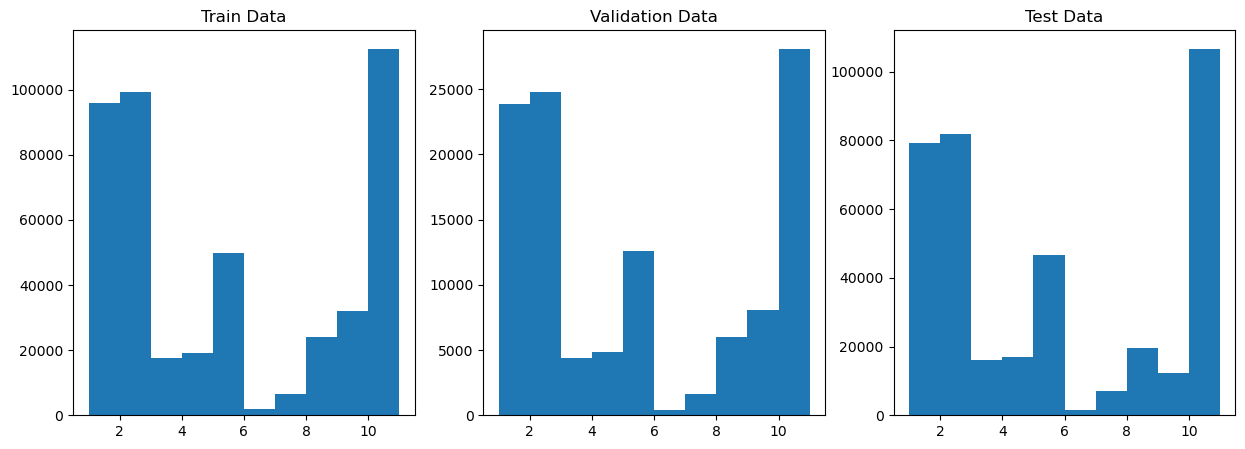

In [24]:
# Cause of Injury Visualizations

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].hist(X_train['Cause of Injury'], bins=10, alpha=1)
axes[0].set_title('Train Data')

axes[1].hist(X_val['Cause of Injury'], bins=10, alpha=1)
axes[1].set_title('Validation Data')\

axes[2].hist(df_test_fe['Cause of Injury'], bins=10, alpha=1)
axes[2].set_title('Test Data') 

From the plots above, we see slighly different distributions in the train/validation against test data. Test data seems to have a lower proportion of category 9: External Forces and Unusal Events. This could be due to the fact that our training data covered the peak years of COVID-19, which is likely considered an unusal event.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="nature">
    
## 3.1.1.2 WCIO Nature of Injury 
 
</a>

We follow a similar process Nature of Injury - grouping together similar natures into broader categories to reduce noise. 

In [28]:
# Group mapping for nature of injury
nature_group_mapping = {
    # Musculoskeletal Injuries
    1: ["STRAIN OR TEAR", "SPRAIN OR TEAR", "DISLOCATION", "FRACTURE", "RUPTURE", "CRUSHING", "HERNIA", "CARPAL TUNNEL SYNDROME"],

    # Trauma and Wounds
    2: ["CONTUSION", "LACERATION", "PUNCTURE", "MULTIPLE PHYSICAL INJURIES ONLY", "BURN", "SEVERANCE", "AMPUTATION"],

    # Cumulative and Chronic Conditions
    3: ["ALL OTHER CUMULATIVE INJURY, NOC", "CARPAL TUNNEL SYNDROME", "HEARING LOSS OR IMPAIRMENT", "VISION LOSS", "DERMATITIS", "CANCER", "ASBESTOSIS", "SILICOSIS", "BLACK LUNG", "BYSSINOSIS"],

    # Infections and Diseases
    4: ["COVID-19", "CONTAGIOUS DISEASE", "INFECTION", "HEPATITIS C", "AIDS"],

    # Mental and Psychological Conditions
    5: ["MENTAL STRESS", "MENTAL DISORDER", "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL"],

    # Neurological and Sensory Disorders
    6: ["CONCUSSION", "LOSS OF HEARING", "VISION LOSS", "SYNCOPE"],

    # Respiratory and Cardiovascular Issues
    7: ["RESPIRATORY DISORDERS", "MYOCARDIAL INFARCTION", "ANGINA PECTORIS", "VASCULAR", "ASPHYXIATION", "DUST DISEASE, NOC"],

    # Environmental and External Factors
    8: ["HEAT PROSTRATION", "ELECTRIC SHOCK", "FREEZING", "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION"],

    # Poisoning and Reactions
    9: ["POISONING - GENERAL (NOT OD OR CUMULATIVE)", "POISONING - CHEMICAL (OTHER THAN METALS)", "POISONING - METAL"],

    # Minor or Rare Injuries
    10: ["FOREIGN BODY", "NO PHYSICAL INJURY", "ALL OTHER SPECIFIC INJURIES, NOC", "VDT - RELATED DISEASES", "ENUCLEATION"],

    # Occupational and Work-Related Illnesses
    11: ["ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC", "HEARING LOSS OR IMPAIRMENT", "DUST DISEASE, NOC", "ASBESTOSIS", "SILICOSIS", "BLACK LUNG", "BYSSINOSIS"],

    # Miscellaneous and Other Conditions
    12: ["MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL", "ADVERSE REACTION TO A VACCINATION OR INOCULATION", "VDT - RELATED DISEASES"]
}


#making a dictionary for group numbers and names for future use
nature_group_dict = {1: 'Musculoskeletal Injuries', 2: 'Trauma and Wounds', 3: 'Cumulative and Chronic Conditions', 4: 'Infections and Diseases',
                     5: 'Mental and Psychological Conditions', 6: 'Neurological and Sensory Disorders', 7: 'Respiratory and Cardiovascular Issues',
                     8: 'Environmental and External Factors', 9: 'Poisoning and Reactions', 10: 'Minor or Rare Injuries', 11: 'Occupational and Work-Related Illnesses',
                     12: 'Miscellaneous and Other Conditions'}


In [29]:

# Create a reverse mapping of descriptions to their respective group number
description_to_nature_group = {}
for group, descriptions in nature_group_mapping.items():
    for description in descriptions:
        description_to_nature_group[description] = group

# Map the descriptions in X_train and X_test to group numbers, with NaN for unmatched descriptions
X_train['Nature of Injury'] = X_train['WCIO Nature of Injury Description'].map(description_to_nature_group).fillna(13)
X_val['Nature of Injury'] = X_val['WCIO Nature of Injury Description'].map(description_to_nature_group).fillna(13)
df_test_fe['Nature of Injury'] = df_test_fe['WCIO Nature of Injury Description'].map(description_to_nature_group).fillna(13)

In [30]:
X_train['Nature of Injury'].value_counts()

Nature of Injury
1.0     197584
2.0     156940
10.0     39675
13.0     23051
4.0      21987
6.0       6454
3.0       5469
11.0      3304
7.0       1757
5.0       1598
8.0        880
12.0       459
9.0         23
Name: count, dtype: int64

In [31]:
X_val['Nature of Injury'].value_counts()

Nature of Injury
1.0     49277
2.0     39592
10.0     9775
13.0     5778
4.0      5435
6.0      1586
3.0      1359
11.0      773
7.0       443
5.0       423
8.0       248
12.0      105
9.0         2
Name: count, dtype: int64

In [32]:
df_test_fe['Nature of Injury'].value_counts()

Nature of Injury
1.0     162041
2.0     149613
10.0     36968
13.0     18873
6.0       6183
3.0       3722
4.0       3487
11.0      2014
5.0       1995
7.0       1891
8.0        872
12.0       280
9.0         36
Name: count, dtype: int64

We confirm once again if every NA got corrected

In [34]:
print(X_train['Nature of Injury'].isna().sum())
print(X_val['Nature of Injury'].isna().sum())
print(df_test_fe['Nature of Injury'].isna().sum())

0
0
0


Text(0.5, 1.0, 'Test Data')

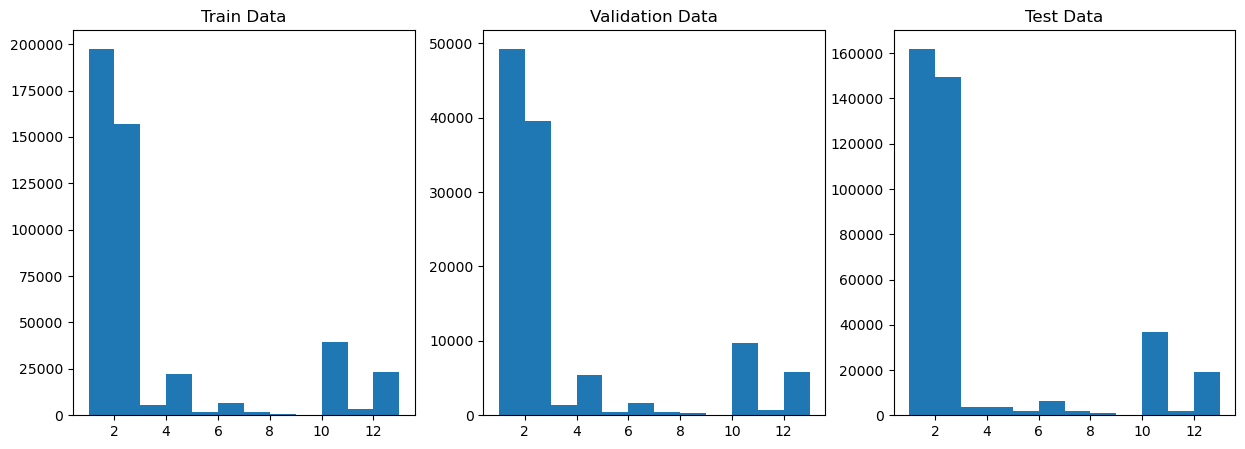

In [35]:
# Nature of Injury Visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].hist(X_train['Nature of Injury'], bins=12, alpha=1)
axes[0].set_title('Train Data')

axes[1].hist(X_val['Nature of Injury'], bins=12, alpha=1)
axes[1].set_title('Validation Data')\

axes[2].hist(df_test_fe['Nature of Injury'], bins=12, alpha=1)
axes[2].set_title('Test Data')                

From the visualizations above, we see our train, validation, and test data all follow similar distributions. We have some class imbalance, with groups such as 7, 8, and 9 with very few values.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="body">
    
## 3.1.1.3 WCIO Part of Body 
 
</a>

Once again, we follow the same grouping process for Part of Body.

In [39]:
bodypart_group_mapping = {
    # Head and Face
    1: ["SKULL", "EYE(S)", "EAR(S)", "MOUTH", "NOSE", "TEETH", "FACIAL BONES", "BRAIN"],

    # Upper Body (Torso)
    2: ["SHOULDER(S)", "CHEST", "UPPER BACK AREA", "LOWER BACK AREA", "ABDOMEN INCLUDING GROIN", "PELVIS", 
        "SACRUM AND COCCYX", "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA)", "VERTEBRAE", "SPINAL CORD", "DISC"],

    # Upper Extremities (Arms and Hands)
    3: ["UPPER ARM", "LOWER ARM", "ELBOW", "WRIST", "HAND", "FINGER(S)", "THUMB", "WRIST (S) & HAND(S)", 
        "MULTIPLE UPPER EXTREMITIES"],

    # Lower Extremities (Legs and Feet)
    4: ["HIP", "UPPER LEG", "LOWER LEG", "KNEE", "ANKLE", "FOOT", "TOES", "GREAT TOE", "MULTIPLE LOWER EXTREMITIES"],

    #  Internal Organs and Systems
    5: ["LUNGS", "HEART", "INTERNAL ORGANS", "BODY SYSTEMS AND MULTIPLE BODY SYSTEMS"],

    # Soft Tissue and General Areas
    6: ["SOFT TISSUE", "BUTTOCKS", "TRACHEA", "LARYNX", "ARTIFICIAL APPLIANCE"],

    # Multiple and Whole Body
    7: ["MULTIPLE HEAD INJURY", "MULTIPLE NECK INJURY", "MULTIPLE TRUNK", "MULTIPLE BODY PARTS (INCLUDING BODY)", 
        "WHOLE BODY", "MULTIPLE", "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED"],

    # Specialized Areas
    8: ["GREAT TOE", "DISC", "SACRUM AND COCCYX", "SPINAL CORD"],

    # No Physical Injury
    9: ["NO PHYSICAL INJURY"]
}


#making a dictionary for group numbers and names for future use
bodypart_group_dict = {1: 'Head and Face', 2: 'Upper Body (Torso)', 3: 'Upper Extremities (Arms and Hands)', 4: 'Lower Extremities (Legs and Feet)',
                       5: 'Internal Organs and Systems', 6: 'Soft Tissue and General Areas', 7: 'Multiple and Whole Body', 8: 'Specialized Areas',
                       9: 'No Physical Injury'}





In [40]:
# Create a reverse mapping of descriptions to their respective group number
description_to_bodypart_group = {}
for group, descriptions in bodypart_group_mapping.items():
    for description in descriptions:
        description_to_bodypart_group[description] = group

# Map the descriptions in X_train and X_test to group numbers, with NaN for unmatched descriptions
X_train['Part of Body'] = X_train['WCIO Part Of Body Description'].map(description_to_bodypart_group).fillna(10)
X_val['Part of Body'] = X_val['WCIO Part Of Body Description'].map(description_to_bodypart_group).fillna(10)
df_test_fe['Part of Body'] = df_test_fe['WCIO Part Of Body Description'].map(description_to_bodypart_group).fillna(10)

In [41]:
X_train['Part of Body'].value_counts()

Part of Body
3.0     112345
4.0      94853
2.0      91231
7.0      48931
10.0     33375
1.0      28188
5.0      23523
6.0      16928
9.0       4937
8.0       4870
Name: count, dtype: int64

In [42]:
X_val['Part of Body'].value_counts()

Part of Body
3.0     28211
4.0     23545
2.0     23162
7.0     12173
10.0     8309
1.0      6986
5.0      5822
6.0      4209
8.0      1213
9.0      1166
Name: count, dtype: int64

In [43]:
df_test_fe['Part of Body'].value_counts()

Part of Body
3.0     95484
7.0     76265
4.0     74658
2.0     70632
1.0     27280
6.0     13842
10.0    11102
5.0      9982
9.0      5034
8.0      3696
Name: count, dtype: int64

And confirm once again that the NA's got eliminated sucessfully

In [45]:
print(X_train['Part of Body'].isna().sum())
print(X_val['Part of Body'].isna().sum())
print(df_test_fe['Part of Body'].isna().sum())

0
0
0


Text(0.5, 1.0, 'Test Data')

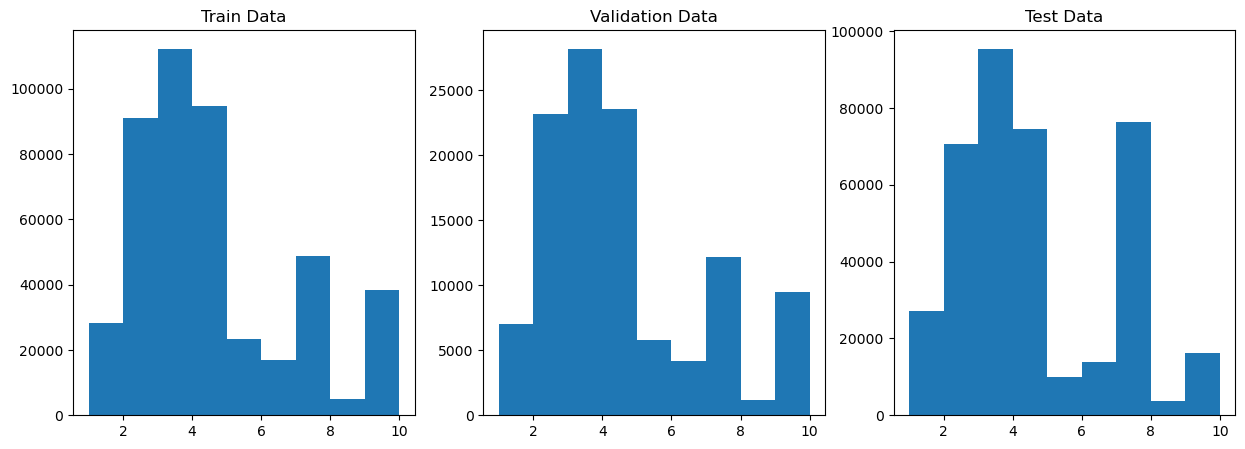

In [46]:
# Part of Body Visualizations

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

axes[0].hist(X_train['Part of Body'], bins=9, alpha=1)
axes[0].set_title('Train Data')

axes[1].hist(X_val['Part of Body'], bins=9, alpha=1)
axes[1].set_title('Validation Data')\

axes[2].hist(df_test_fe['Part of Body'], bins=9, alpha=1)
axes[2].set_title('Test Data') 

The distributions of our data in train and validation are quite similar, but our test data shows minor differences. There is a much high preoportion of Category 7: 'Multiple and Whole Body' and a lower proportion of Category 5: 'Internal Organs and Systems' in our test data as compared to our training and validation data. There is no obvious explanation for this. We will not make adjustments but will be aware of the difference as we move forward.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
### For all WCIO variables: 
 
</a>

- We decided to drop, for now, every column with description of a code in other column, in the model we will only use the code
- So we created a dictionary for each one of those columns to save the connection between code and description so that we can access the description later

In [50]:
# WCIO Cause of Injury
cause_of_injury_all = X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].set_index('WCIO Cause of Injury Code')['WCIO Cause of Injury Description'].to_dict()
cause_of_injury_dict = {} 
for key, value in cause_of_injury_all.items():
    if not (isinstance(value, float) and math.isnan(value)):
        cause_of_injury_dict[key] = value
        
# WCIO Nature of Injury
nature_of_injury_all = X_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].set_index('WCIO Nature of Injury Code')['WCIO Nature of Injury Description'].to_dict()
nature_of_injury_dict = {}
for key, value in nature_of_injury_all.items():
    if not (isinstance(value, float) and math.isnan(value)):
        nature_of_injury_dict[key] = value
        
# WCIO Part Of Body
part_of_body_all = X_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].set_index('WCIO Part Of Body Code')['WCIO Part Of Body Description'].to_dict()
part_of_body_dict = {}
for key, value in part_of_body_all.items():
    if not (isinstance(value, float) and math.isnan(value)):
        part_of_body_dict[key] = value

# Industry Code
industry_code_all = X_train[['Industry Code', 'Industry Code Description']].set_index('Industry Code')['Industry Code Description'].to_dict()
industry_code_dict = {}
for key, value in industry_code_all.items():
    if not (isinstance(value, float) and math.isnan(value)):
        industry_code_dict[key] = value

In [51]:
#We an now drop all columns with descriptons
X_train.drop(columns=[col for col in X_train.columns if 'description' in col.lower()], inplace=True)
X_val.drop(columns=[col for col in X_val.columns if 'description' in col.lower()], inplace=True)
df_test_fe.drop(columns=[col for col in df_test_fe.columns if 'description' in col.lower()], inplace=True)

<hr>
<div class="alert alert-block alert-info" style="font-size:12px">
    
# Key Notes: New WCIO Variables
- New features have been created that group similar, natures, causes, and parts of the body together. For the most part, distributions between our train/validation and test data are similar.
- All description columns have been dropped, as they are fully redundant with the codes and unnusable in models. Dictionaries have been made to access the descriptions that match the codes later on, if necessary.

    
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="diff">
    
# 3.2. Difference in Data Features 
 
</a>

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="acc_ass">
    
## 3.2.1 Accident Date to Assembly Date
 
</a>

We hypothesize that the time between the accident and the assembly may be a good indicator of severity; the more severe the injury, the sooner the assembly date.

In [56]:
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'])
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'])

X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'])
X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'])

df_test_fe['Accident Date'] = pd.to_datetime(df_test_fe['Accident Date'])
df_test_fe['Assembly Date'] = pd.to_datetime(df_test_fe['Assembly Date'])

# Create a new column with the difference between 'Accident Date' and 'Assembly Date'
X_train['Accident to Assembly'] = X_train['Assembly Date'] - X_train['Accident Date']
X_val['Accident to Assembly'] = X_val['Assembly Date'] - X_val['Accident Date']
df_test_fe['Accident to Assembly'] = df_test_fe['Assembly Date'] - df_test_fe['Accident Date']

# Calculate the difference in days
X_train['Accident to Assembly Days'] = X_train['Accident to Assembly'].dt.days
X_val['Accident to Assembly Days'] = X_val['Accident to Assembly'].dt.days
df_test_fe['Accident to Assembly Days'] = df_test_fe['Accident to Assembly'].dt.days

We will keep 'Accident to Assembly Days' and drop 'Accident to Assembly' because days is numeric which will work with our model later on

In [58]:
X_train.drop('Accident to Assembly', axis = 1, inplace = True)
X_val.drop('Accident to Assembly', axis = 1, inplace = True)
df_test_fe.drop('Accident to Assembly', axis = 1, inplace = True)

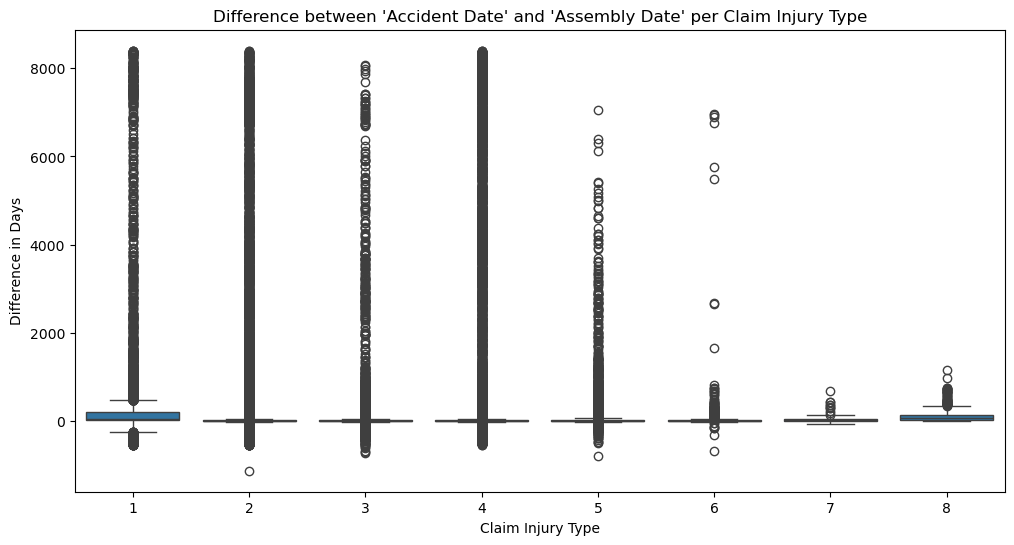

In [59]:
# Ensure y_train is a 1D array or Series
y_train = y_train.squeeze()  # Converts (459013, 1) to (459013,)

# 1. Boxplot for difference between 'Accident Date' and 'Assembly Date' per Claim Injury Type
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train, y='Accident to Assembly Days', data=X_train)
plt.title("Difference between 'Accident Date' and 'Assembly Date' per Claim Injury Type")
plt.xlabel('Claim Injury Type')
plt.ylabel('Difference in Days')
plt.show()

From the visualization, we notice there are some negative values, which doesn't make sense, assembly date should never happen before accident date. We can't remove these rows in our test data, so to maintain consistency and to have the least effect on our data, we will find the median difference between Accident Date and Assembly Date. We will then adjust the Assembly Dates that occur before Accident Date to be the equal to: Accident Date + median difference. We use the median rather than the mean due to the presence of many outliers.

In [61]:
#examining the rows in question in training data
X_train[X_train['Accident to Assembly Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5567041,2021-06-27,59.0,0,2020-09-29,1,1070.12,1962.0,2020-10-06 00:00:00.000000000,1,TRAVELERS INDEMNITY CO OF AMER,...,2,52.0,72.0,13.0,6.0,0,8.0,6.0,1.0,-271
5548633,2020-09-23,33.0,0,2020-08-31,1,2442.58,1987.0,2021-12-08 00:00:00.000000000,1,"CNY OTHER THAN ED, HED WATER",...,4,97.0,71.0,51.0,1.0,1,8.0,11.0,4.0,-23
5564102,2021-06-27,63.0,0,2020-09-23,1,500.00,1958.0,2020-10-07 00:00:00.000000000,1,INDEMNITY INS. OF N AMERICA,...,3,94.0,52.0,38.0,4.0,1,8.0,1.0,2.0,-277
5650566,2021-04-05,43.0,0,2021-02-04,1,2644.74,1977.0,2022-03-30 00:00:00.000000000,1,"CNY OTHER THAN ED, HED WATER",...,0,97.0,78.0,35.0,3.0,1,8.0,3.0,3.0,-60
5493338,2021-06-27,58.0,0,2020-06-05,1,1070.12,1963.0,2021-03-08 00:00:00.000000000,1,"POLICE, FIRE, SANITATION",...,4,83.0,83.0,48.0,1.0,0,9.0,4.0,5.0,-387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451531,2020-05-08,55.0,0,2020-03-13,1,992.29,1964.0,2020-03-23 00:00:00.000000000,1,STATE INSURANCE FUND,...,2,97.0,52.0,35.0,4.0,1,8.0,1.0,3.0,-56
6026699,2022-07-11,20.0,0,2022-06-30,1,750.00,2001.0,2022-07-15 00:00:00.000000000,1,STARR SPECIALTY INSURANCE,...,1,97.0,71.0,34.0,5.0,1,8.0,11.0,3.0,-11
5504257,2021-06-27,62.0,0,2020-06-25,1,1070.12,1959.0,2020-07-03 00:00:00.000000000,1,STATE INSURANCE FUND,...,2,97.0,78.0,35.0,0.0,0,8.0,3.0,3.0,-367


In [62]:
#examining the rows in question in validation data
X_val[X_val['Accident to Assembly Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5491098,2021-06-27,32.0,0,2020-06-03,1,1070.12,1989.0,2020-05-30 01:27:10.116290761,1,CITY SCHOOL DISTRICT,...,1,0.0,0.0,0.0,1.0,0,11.0,13.0,10.0,-389
5497389,2021-06-27,58.0,0,2020-06-12,1,1070.12,1963.0,2020-06-24 00:00:00.000000000,1,CHARTER OAK FIRE INS CO,...,2,97.0,78.0,34.0,2.0,0,8.0,3.0,3.0,-380
5699732,2021-06-27,62.0,0,2021-04-14,1,1070.12,1959.0,2021-04-10 01:27:10.116290761,1,MEMIC INDEMNITY COMPANY,...,4,0.0,0.0,0.0,3.0,0,11.0,13.0,10.0,-74
5535997,2022-04-13,46.0,0,2020-08-13,1,1138.17,1975.0,2022-07-20 00:00:00.000000000,1,"CNY OTHER THAN ED, HED WATER",...,4,97.0,71.0,-9.0,3.0,1,8.0,11.0,7.0,-608
5497303,2020-07-13,42.0,0,2020-06-12,1,1070.12,1978.0,2021-08-18 00:00:00.000000000,1,"CNY OTHER THAN ED, HED WATER",...,4,99.0,78.0,35.0,2.0,1,10.0,3.0,3.0,-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564807,2021-04-15,60.0,0,2020-09-24,1,3270.00,1961.0,2021-07-15 00:00:00.000000000,1,AIU INSURANCE CO,...,4,98.0,72.0,13.0,5.0,1,8.0,6.0,1.0,-203
5962002,2022-05-03,44.0,0,2022-04-08,1,670.30,1977.0,2022-04-20 00:00:00.000000000,1,UNITED WISCONSIN INSURANCE CO,...,2,97.0,78.0,39.0,3.0,1,8.0,3.0,3.0,-25
5550671,2021-06-27,49.0,0,2020-09-03,0,1070.12,1972.0,2020-08-30 01:27:10.116290761,1,COUNTY OF SUFFOLK,...,4,0.0,0.0,0.0,1.0,0,11.0,13.0,10.0,-297


In [63]:
#examining the rows in question in test data
df_test_fe[df_test_fe['Accident to Assembly Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6166393,2023-01-08,49,0,2023-01-03,1,1070.12,1973.0,2023-01-03 00:00:00.000000000,0,STATE INSURANCE FUND,...,1,19.0,43.0,35.0,3,0,5.0,2.0,3.0,-5
6166531,2023-01-30,49,0,2023-01-04,1,1070.12,1974.0,2023-01-10 00:00:00.000000000,1,NYC TRANSIT AUTHORITY,...,0,99.0,78.0,35.0,3,0,10.0,3.0,3.0,-26
6167475,2023-01-12,48,0,2023-01-05,1,3800.85,1974.0,2023-12-02 00:00:00.000000000,1,"CNY OTHER THAN ED, HED WATER",...,3,97.0,71.0,-9.0,0,1,8.0,11.0,7.0,-7
6168673,2023-02-01,39,0,2023-01-06,1,226.00,1984.0,2023-06-30 00:00:00.000000000,1,SAFETY NATIONAL CASUALTY CORP,...,3,97.0,52.0,38.0,6,1,8.0,1.0,2.0,-26
6167808,2023-01-31,55,0,2023-01-06,1,2404.19,1967.0,2023-01-17 00:00:00.000000000,1,STATE INSURANCE FUND,...,1,98.0,71.0,35.0,5,1,8.0,11.0,3.0,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480079,2024-03-07,47,0,2024-02-26,1,1070.12,1977.0,2024-02-24 00:00:00.000000000,1,"POLICE, FIRE, SANITATION",...,4,99.0,59.0,-9.0,6,0,10.0,10.0,7.0,-10
6493804,2024-04-03,57,0,2024-03-14,0,1070.12,1966.0,2024-03-14 00:00:00.000000000,0,NEW JERSEY MANUFACTURERS,...,4,98.0,80.0,91.0,4,1,8.0,3.0,5.0,-20
6494572,2024-03-27,40,0,2024-03-15,1,625.90,1984.0,2024-03-15 00:00:00.000000000,1,SAFETY NATIONAL CASUALTY CORP,...,1,97.0,52.0,35.0,0,1,8.0,1.0,3.0,-12


In [64]:
#finding the median difference between Accident Date and Assembly Date
median_accident_assembly = X_train['Accident to Assembly Days'].median()
print(median_accident_assembly)

10.0


In [65]:
median_accident_assembly = pd.Timedelta(days = median_accident_assembly)
print(median_accident_assembly)

10 days 00:00:00


In [66]:
# first we will fix the Assembly Date values that occur before Accident Date
X_train.loc[X_train['Accident to Assembly Days'] < 0, 'Assembly Date'] = X_train['Accident Date'] + median_accident_assembly
X_val.loc[X_val['Accident to Assembly Days'] < 0, 'Assembly Date'] = X_val['Accident Date'] + median_accident_assembly
df_test_fe.loc[df_test_fe['Accident to Assembly Days'] < 0, 'Assembly Date'] = df_test_fe['Accident Date'] + median_accident_assembly


In [67]:
# next we will recalculate the difference between Accident Date and Assembly Date (recycling code)

# Create a new column with the difference between 'Accident Date' and 'Assembly Date'
X_train['Accident to Assembly'] = X_train['Assembly Date'] - X_train['Accident Date']
X_val['Accident to Assembly'] = X_val['Assembly Date'] - X_val['Accident Date']
df_test_fe['Accident to Assembly'] = df_test_fe['Assembly Date'] - df_test_fe['Accident Date']

# Calculate the difference in days
X_train['Accident to Assembly Days'] = X_train['Accident to Assembly'].dt.days
X_val['Accident to Assembly Days'] = X_val['Accident to Assembly'].dt.days
df_test_fe['Accident to Assembly Days'] = df_test_fe['Accident to Assembly'].dt.days

We check once again to see if the rows were updated correctly.

In [69]:
#checking to make sure they are gone
X_train[X_train['Accident to Assembly Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days,Accident to Assembly
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


In [70]:
#checking to make sure they are gone
X_val[X_val['Accident to Assembly Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days,Accident to Assembly
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


In [71]:
#checking to make sure they are gone
df_test_fe[df_test_fe['Accident to Assembly Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days,Accident to Assembly
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


In [72]:
# once again dropping 'Accident to Assembly' but keeping 'Accident to Assembly Days'
X_train.drop('Accident to Assembly', axis = 1, inplace = True)
X_val.drop('Accident to Assembly', axis = 1, inplace = True)
df_test_fe.drop('Accident to Assembly', axis = 1, inplace = True)

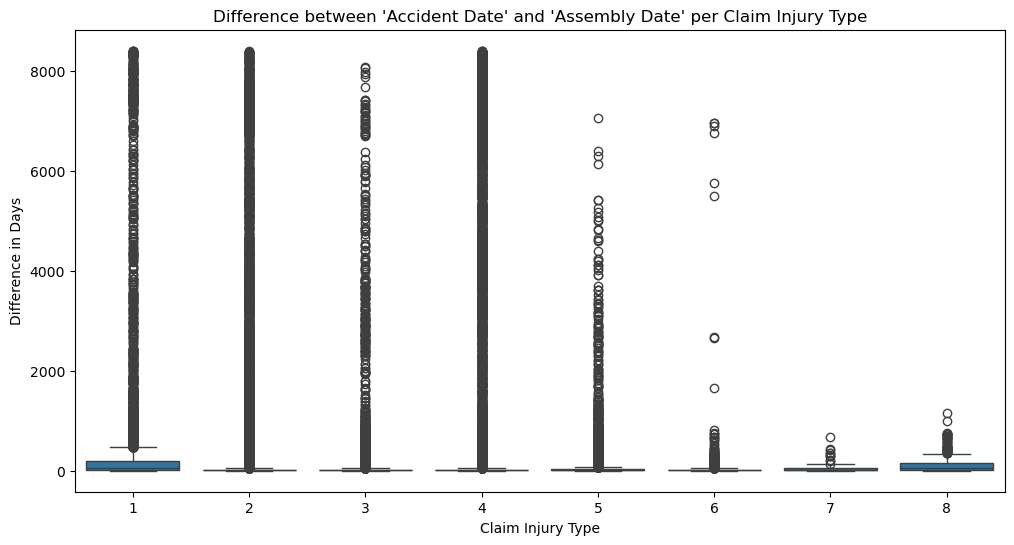

In [73]:
# New Boxplot for difference between 'Accident Date' and 'Assembly Date' per Claim Injury Type without negatives

plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train, y='Accident to Assembly Days', data=X_train)
plt.title("Difference between 'Accident Date' and 'Assembly Date' per Claim Injury Type")
plt.xlabel('Claim Injury Type')
plt.ylabel('Difference in Days')
plt.show()

By examing the plot above, we can see that the more severe the injury type, the fewer the number of days between Accident Date and Assembly Date. More specifically, there are fewer high outlier values. This seems to be espeically true for injuries with severity between 6 and 8. This makes sense intuitively, as a more severe injury (or a death) should motivate a faster process in the WCB.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="acc_c2">
    
## 3.2.2 Accident Date to C-2 Date
 
</a>

Similar to Accident to Assembly, we hypothesized that the time between the accident and the receipt of the Report regarding the injury may indicate its severity.

In [77]:
# Convert dates and handle any invalid formats
X_train['C-2 Date'] = pd.to_datetime(X_train['C-2 Date'], errors='coerce')
X_val['C-2 Date'] = pd.to_datetime(X_val['C-2 Date'], errors='coerce')
df_test_fe['C-2 Date'] = pd.to_datetime(df_test_fe['C-2 Date'], errors='coerce')

X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')
df_test_fe['Accident Date'] = pd.to_datetime(df_test_fe['Accident Date'], errors='coerce')

# Create a new column with the difference between 'Accident Date' and 'C-2 Date'
X_train['Accident to C-2'] = X_train['C-2 Date'] - X_train['Accident Date']
X_val['Accident to C-2'] = X_val['C-2 Date'] - X_val['Accident Date']
df_test_fe['Accident to C-2'] = df_test_fe['C-2 Date'] - df_test_fe['Accident Date']

# Calculate the difference in days
X_train['Accident to C-2 Days'] = X_train['Accident to C-2'].dt.days
X_val['Accident to C-2 Days'] = X_val['Accident to C-2'].dt.days
df_test_fe['Accident to C-2 Days'] = df_test_fe['Accident to C-2'].dt.days

We will keep 'Accident to C-2 Days' and drop 'Accident to C-2' because days is numeric which will work with our model later on

In [79]:
X_train.drop('Accident to C-2', axis = 1, inplace = True)
X_val.drop('Accident to C-2', axis = 1, inplace = True)
df_test_fe.drop('Accident to C-2', axis = 1, inplace = True)

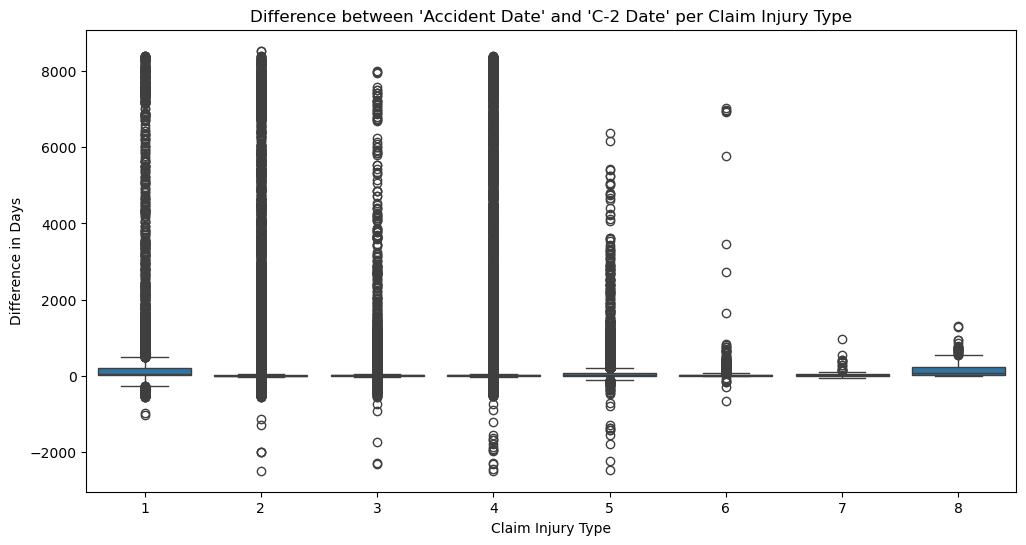

In [80]:
# Boxplot for difference between 'Accident Date' and 'C-2 Date' per Claim Injury Type
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train, y='Accident to C-2 Days', data=X_train)
plt.title("Difference between 'Accident Date' and 'C-2 Date' per Claim Injury Type")
plt.xlabel('Claim Injury Type')
plt.ylabel('Difference in Days')
plt.show()

Once again, we notice a negative different between the C-2 (receipt of incident report) and date of accident. The interpretation of this is that the incident report was submitted before the accident occurred. Clearly that is not possible, so we assume those values to be erraneous, and deal with them in the same way we dealy with 'Accident to Assembly'.

In [82]:
# examining the rows in question
X_train[X_train['Accident to C-2 Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days,Accident to C-2 Days
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5567041,2021-06-27,59.0,0,2021-07-07,1,1070.12,1962.0,2020-10-06 00:00:00.000000000,1,TRAVELERS INDEMNITY CO OF AMER,...,52.0,72.0,13.0,6.0,0,8.0,6.0,1.0,10,-264
5564102,2021-06-27,63.0,0,2021-07-07,1,500.00,1958.0,2020-10-07 00:00:00.000000000,1,INDEMNITY INS. OF N AMERICA,...,94.0,52.0,38.0,4.0,1,8.0,1.0,2.0,10,-263
5493338,2021-06-27,58.0,0,2021-07-07,1,1070.12,1963.0,2021-03-08 00:00:00.000000000,1,"POLICE, FIRE, SANITATION",...,83.0,83.0,48.0,1.0,0,9.0,4.0,5.0,10,-111
5610095,2020-12-03,66.0,0,2020-12-03,1,1070.12,1954.0,2020-11-29 01:27:10.116290761,1,CHARTER OAK FIRE INS CO,...,0.0,0.0,0.0,1.0,0,11.0,13.0,10.0,0,-4
5634589,2021-06-27,42.0,0,2021-07-07,1,1070.12,1979.0,2021-03-02 00:00:00.000000000,1,XL SPECIALTY INSURANCE CO,...,99.0,31.0,13.0,6.0,0,10.0,11.0,1.0,10,-117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003717,2022-06-14,50.0,0,2022-06-24,1,1988.73,1972.0,2022-06-01 00:00:00.000000000,1,WILLIAMSVILLE CSD,...,97.0,78.0,34.0,1.0,1,8.0,3.0,3.0,10,-13
5451531,2020-05-08,55.0,0,2020-05-18,1,992.29,1964.0,2020-03-23 00:00:00.000000000,1,STATE INSURANCE FUND,...,97.0,52.0,35.0,4.0,1,8.0,1.0,3.0,10,-46
5504257,2021-06-27,62.0,0,2021-07-07,1,1070.12,1959.0,2020-07-03 00:00:00.000000000,1,STATE INSURANCE FUND,...,97.0,78.0,35.0,0.0,0,8.0,3.0,3.0,10,-359


In [83]:
# examining the rows in question
X_val[X_val['Accident to C-2 Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days,Accident to C-2 Days
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5491098,2021-06-27,32.0,0,2021-07-07,1,1070.12,1989.0,2020-05-30 01:27:10.116290761,1,CITY SCHOOL DISTRICT,...,0.0,0.0,0.0,1.0,0,11.0,13.0,10.0,10,-393
5497389,2021-06-27,58.0,0,2021-07-07,1,1070.12,1963.0,2020-06-24 00:00:00.000000000,1,CHARTER OAK FIRE INS CO,...,97.0,78.0,34.0,2.0,0,8.0,3.0,3.0,10,-368
5699732,2021-06-27,62.0,0,2021-07-07,1,1070.12,1959.0,2021-04-10 01:27:10.116290761,1,MEMIC INDEMNITY COMPANY,...,0.0,0.0,0.0,3.0,0,11.0,13.0,10.0,10,-78
5525378,2020-07-27,35.0,0,2020-07-29,0,1070.12,1984.0,2020-07-25 01:27:10.116290761,1,STATE INSURANCE FUND,...,0.0,0.0,0.0,5.0,0,11.0,13.0,10.0,2,-2
5460610,2021-06-27,59.0,0,2021-07-07,1,1070.12,1962.0,2020-04-09 00:00:00.000000000,1,NY MUNICIPAL WC ALLIANCE,...,99.0,31.0,13.0,1.0,0,10.0,11.0,1.0,10,-444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962002,2022-05-03,44.0,0,2022-05-13,1,670.30,1977.0,2022-04-20 00:00:00.000000000,1,UNITED WISCONSIN INSURANCE CO,...,97.0,78.0,39.0,3.0,1,8.0,3.0,3.0,10,-13
5550671,2021-06-27,49.0,0,2021-07-07,0,1070.12,1972.0,2020-08-30 01:27:10.116290761,1,COUNTY OF SUFFOLK,...,0.0,0.0,0.0,1.0,0,11.0,13.0,10.0,10,-301
5848868,2021-11-03,36.0,0,2021-11-03,0,1070.12,1985.0,2021-10-30 01:27:10.116290761,0,PFL NI CARRIER UNDETERMINED,...,0.0,0.0,0.0,4.0,0,11.0,13.0,10.0,0,-4


In [84]:
# examining the rows in question
df_test_fe[df_test_fe['Accident to C-2 Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days,Accident to C-2 Days
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6166393,2023-01-08,49,0,2023-01-18,1,1070.12,1973.0,2023-01-03 00:00:00.000000000,0,STATE INSURANCE FUND,...,19.0,43.0,35.0,3,0,5.0,2.0,3.0,10,-5
6166531,2023-01-30,49,0,2023-02-09,1,1070.12,1974.0,2023-01-10 00:00:00.000000000,1,NYC TRANSIT AUTHORITY,...,99.0,78.0,35.0,3,0,10.0,3.0,3.0,10,-20
6167808,2023-01-31,55,0,2023-02-10,1,2404.19,1967.0,2023-01-17 00:00:00.000000000,1,STATE INSURANCE FUND,...,98.0,71.0,35.0,5,1,8.0,11.0,3.0,10,-14
6168677,2023-01-31,60,0,2023-02-10,1,1647.46,1962.0,2023-01-14 00:00:00.000000000,1,NYC TRANSIT AUTHORITY,...,99.0,31.0,13.0,5,1,10.0,11.0,1.0,10,-17
6172235,2023-02-03,51,0,2023-02-13,1,1500.00,1971.0,2023-01-11 00:00:00.000000000,1,A I U INSURANCE COMPANY,...,98.0,52.0,37.0,2,1,8.0,1.0,3.0,10,-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553320,2024-06-04,52,0,2024-06-05,0,1070.12,1972.0,2024-06-01 01:27:10.116290761,0,MONTAUK UNION FREE,...,0.0,0.0,0.0,6,0,11.0,13.0,10.0,1,-3
6554041,2024-06-02,37,0,2024-06-05,0,1070.12,1987.0,2024-06-01 01:27:10.116290761,0,UNITED WISCONSIN INSURANCE CO,...,0.0,0.0,0.0,2,0,11.0,13.0,10.0,3,-1
6553759,2024-06-04,37,0,2024-06-05,0,1070.12,1986.0,2024-06-01 01:27:10.116290761,0,AMERICAN ZURICH INSURANCE CO,...,0.0,0.0,0.0,4,0,11.0,13.0,10.0,1,-3


In [85]:
#finding the median difference between Accident Date and Assembly Date
median_accident_c2 = X_train['Accident to C-2 Days'].median()
print(median_accident_c2)

10.0


In [86]:
median_accident_c2 = pd.Timedelta(days = median_accident_c2)
print(median_accident_c2)

10 days 00:00:00


In [87]:
# first we will fix the C-2 Dates values that occur before Accident Date
X_train.loc[X_train['Accident to C-2 Days'] < 0, 'C-2 Date'] = X_train['Accident Date'] + median_accident_c2
X_val.loc[X_val['Accident to C-2 Days'] < 0, 'C-2 Date'] = X_val['Accident Date'] + median_accident_c2
df_test_fe.loc[df_test_fe['Accident to C-2 Days'] < 0, 'C-2 Date'] = df_test_fe['Accident Date'] + median_accident_c2

In [88]:
# next we will recalculate the difference between Accident Date and C-2 Date (recycling code)

# Create a new column with the difference between 'Accident Date' and 'C-2 Date'
X_train['Accident to C-2'] = X_train['C-2 Date'] - X_train['Accident Date']
X_val['Accident to C-2'] = X_val['C-2 Date'] - X_val['Accident Date']
df_test_fe['Accident to C-2'] = df_test_fe['C-2 Date'] - df_test_fe['Accident Date']

# Calculate the difference in days
X_train['Accident to C-2 Days'] = X_train['Accident to C-2'].dt.days
X_val['Accident to C-2 Days'] = X_val['Accident to C-2'].dt.days
df_test_fe['Accident to C-2 Days'] = df_test_fe['Accident to C-2'].dt.days


We verify if the change was done correctly

In [90]:
#checking to make sure they are gone
X_train[X_train['Accident to C-2 Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days,Accident to C-2 Days,Accident to C-2
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


In [91]:
#checking to make sure they are gone
X_val[X_val['Accident to C-2 Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days,Accident to C-2 Days,Accident to C-2
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


In [92]:
#checking to make sure they are gone
df_test_fe[df_test_fe['Accident to C-2 Days'] < 0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Non-Zero Wage,Cause of Injury,Nature of Injury,Part of Body,Accident to Assembly Days,Accident to C-2 Days,Accident to C-2
Claim Identifier,,,,,,,,,,,,,,,,,,,,,


In [93]:
# once again dropping 'Accident to C-2' but keeping 'Accident to C-2 Days'
X_train.drop('Accident to C-2', axis = 1, inplace = True)
X_val.drop('Accident to C-2', axis = 1, inplace = True)
df_test_fe.drop('Accident to C-2', axis = 1, inplace = True)

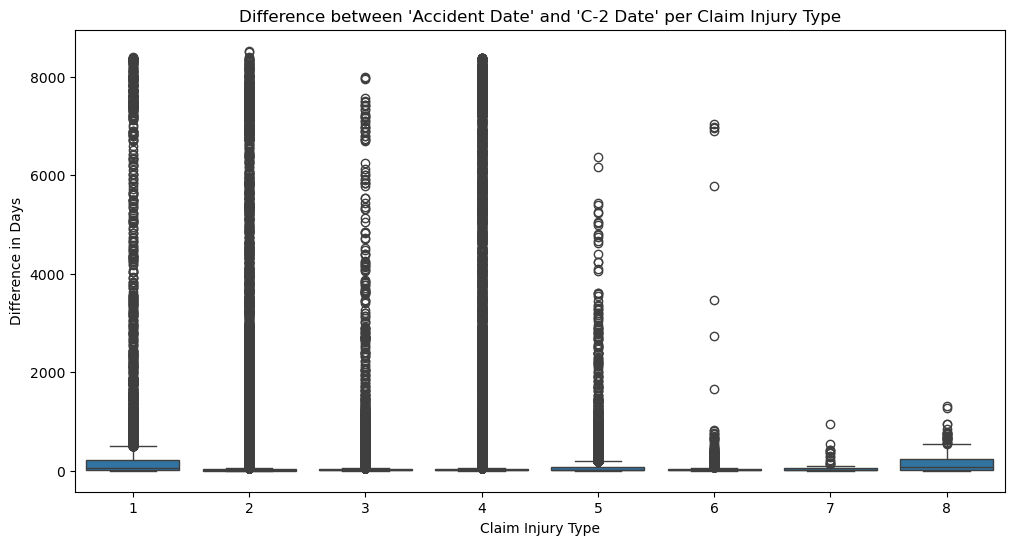

In [94]:
# New Boxplot for difference between 'Accident Date' and 'C-2 Date' per 'Claim Injury Type' without negative values

plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train, y='Accident to C-2 Days', data=X_train)
plt.title("Difference between 'Accident Date' and 'C-2 Date' per Claim Injury Type")
plt.xlabel('Claim Injury Type')
plt.ylabel('Difference in Days')
plt.show()

Similar to our analysis of Accident Date and Assembly date, in the plot above, we can see a general trend that the more severe the injury type, the fewer the number of days between Accident Date and C-2 date. This seems to be espeically true for injuries with severity between 6 and 8.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="ages">
    
## 3.2.3 Age Group
 
</a>

We created a new feature that help us group people by age, so we can possibly take conclusions with the different age groups.
The usefulness of this feature will later be tested in Feature Selection.

In [98]:
# Create a new column with the different age groups
X_train['Age Group'] = pd.cut(X_train['Age at Injury'], bins=[0, 25, 45, 65, 100], labels=['Teen', 'Adult', 'Senior', 'Elderly'])
X_val['Age Group'] = pd.cut(X_val['Age at Injury'], bins=[0, 25, 45, 65, 100], labels=['Teen', 'Adult', 'Senior', 'Elderly'])
df_test_fe['Age Group'] = pd.cut(df_test_fe['Age at Injury'], bins=[0, 25, 45, 65, 100], labels=['Teen', 'Adult', 'Senior', 'Elderly'])


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="seasons">
    
## 3.2.4 Accident Season
 
</a>

We also create a feature to understand the season where the accident occured. This way we will try to find a possible pattern to help our model predict the target.
This feature usefulness will also be tested in Feature Selection.

In [101]:
X_train['Accident Season'] = X_train['Accident Date'].dt.month % 12 // 3 + 1
X_train['Accident Season'] = X_train['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

X_val['Accident Season'] = X_val['Accident Date'].dt.month % 12 // 3 + 1
X_val['Accident Season'] = X_val['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

df_test_fe['Accident Season'] = df_test_fe['Accident Date'].dt.month % 12 // 3 + 1
df_test_fe['Accident Season'] = df_test_fe['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})



<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="wknd">
    
## 3.2.5 Is Weekend
 
</a>

We create an additional feature to understand if the accident ocurred on a weekend or not. This will help us, just as the previous feature try to understand patterns to better predict the target.

In [104]:
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')
X_train['Accident Date_IsWeekend'] = (X_train['Accident Date'].dt.dayofweek > 4).astype(int)

X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')
X_val['Accident Date_IsWeekend'] = (X_val['Accident Date'].dt.dayofweek > 4).astype(int)

df_test_fe['Accident Date'] = pd.to_datetime(df_test_fe['Accident Date'], errors='coerce')
df_test_fe['Accident Date_IsWeekend'] = (df_test_fe['Accident Date'].dt.dayofweek > 4).astype(int)


In [105]:
X_train['Accident Date_IsWeekend'] = X_train['Accident Date_IsWeekend'].astype(int)

In [106]:
X_train['Accident Date_IsWeekend'].head(10) 

Claim Identifier
5785935    0
6090033    0
6136197    0
6019545    0
5792247    0
5522905    0
5567041    1
5565290    0
5719790    1
5812021    0
Name: Accident Date_IsWeekend, dtype: int64

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="age_wage">
    
## 3.2.6 Age Wage Interaction
 
</a>

We also created a Interaction feature of Age and Wage since this could be a good insight for the model to have.
This feature will later be evaluated in Feature Selection to understand its usefulness.

In [109]:
X_train['Age_Wage_interaction'] = X_train['Age at Injury'] * X_train['Average Weekly Wage']
X_val['Age_Wage_interaction'] = X_val['Age at Injury'] * X_val['Average Weekly Wage']
df_test_fe['Age_Wage_interaction'] = df_test_fe['Age at Injury'] * df_test_fe['Average Weekly Wage']


In [110]:
# Display the new features to verify
print(X_train[['Age at Injury','Average Weekly Wage','Age_Wage_interaction']])

                  Age at Injury  Average Weekly Wage  Age_Wage_interaction
Claim Identifier                                                          
5785935                    49.0               744.06              36458.94
6090033                    56.0               845.29              47336.24
6136197                    48.0              1070.12              51365.76
6019545                    55.0              1070.12              58856.60
5792247                    53.0               668.08              35408.24
...                         ...                  ...                   ...
5837651                    26.0              1244.56              32358.56
5781926                    55.0               969.26              53309.30
5890060                    57.0               794.09              45263.13
6148528                    25.0              1070.12              26753.00
6027959                    26.0              1070.12              27823.12

[459181 rows x 3 columns

We will create a copy of df_train_fe to examine the relationship between our new feature and our target variable.

In [112]:
df_train_age_wage = df_train_fe.copy()

We then do a correlation with the target variable to understand if it has a high correlation or not. For this correlation we dont take the 0's of Age-Wage Interaction since if the Wage was put as 0 the interaction is always 0.

                      Correlation with Target
age_wage_interaction                 0.206127


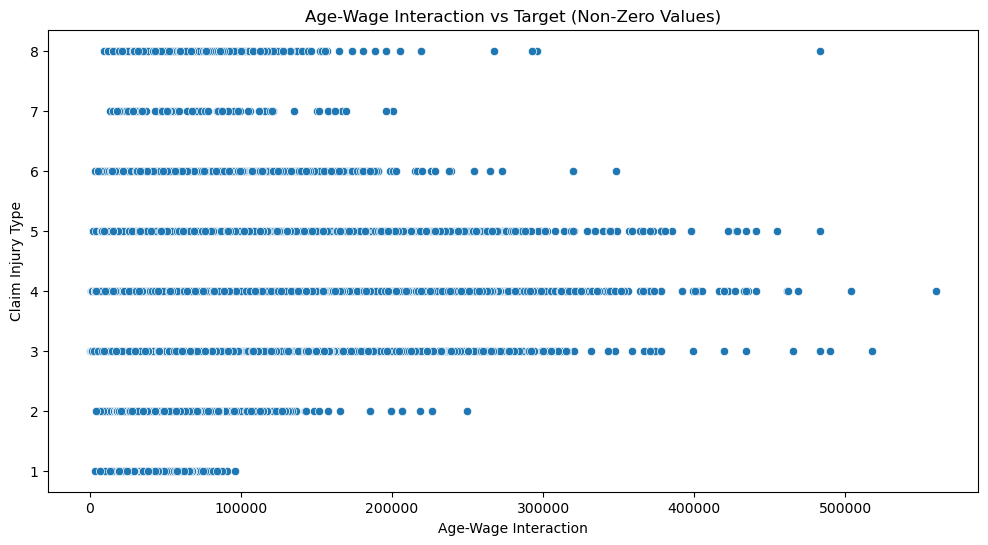

In [114]:
# Ensure interaction terms are created
df_train_age_wage['Age_Wage_interaction'] = df_train_age_wage['Age at Injury'] * df_train_age_wage['Average Weekly Wage']

# Filter out rows where Age_Wage_interaction equals 0
data_filtered = df_train_age_wage[df_train_age_wage['Age_Wage_interaction'] != 0]

# Calculate correlations with the target variable
correlation_results = {
    'age_wage_interaction': data_filtered[['Age_Wage_interaction', 'Claim Injury Type']].corr().iloc[0, 1]
}

# Display correlation results
correlation_summary = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation with Target'])
print(correlation_summary)

# Scatterplot for Age-Wage Interaction
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_filtered['Age_Wage_interaction'], y=data_filtered['Claim Injury Type'])
plt.title('Age-Wage Interaction vs Target (Non-Zero Values)')
plt.xlabel('Age-Wage Interaction')
plt.ylabel('Claim Injury Type')
plt.show()


As we can see, there is no strong correlation between Age-Wage Interaction and the Claim Injury type. 
Even after removing zero values, there is still a heavy concentration of data points at lower Age-Wage Interaction values,
suggesting that the majority of claims involve younger or lower-wage workers.

Claim Injury Type 4 (Temporary) and Type 5 (PPD SCH LOSS) dominate the lower and mid-interaction ranges.
Higher-severity injuries (6–8) are less frequent and appear mainly at low interaction values.
After 400000 are likeky outliers so we won't consider them for the research.

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="date_dtype">
    
# 3.3 Date Feature dataypes
 
</a>

From our individual feature analysis, we know that 1961-09-06 is the earliest date in the dataset.
We will use this as a reference date to maintain meaning in date features while transforming them into numeric datatypes, in the form of number of days since our reference data.

In [118]:
datetime_cols = ['Accident Date', 'Assembly Date', 'C-2 Date']

reference_date = pd.Timestamp('1961-09-06')

In [119]:
# Ensure the columns in datetime_cols are datetime type
for column in datetime_cols:
    X_train[column] = pd.to_datetime(X_train[column], errors='coerce')  # Convert to datetime
    X_val[column] = pd.to_datetime(X_val[column], errors='coerce')
    df_test_fe[column] = pd.to_datetime(df_test_fe[column], errors='coerce')

# Set a consistent reference date
reference_date = pd.Timestamp('1961-09-06')

# Calculate days difference for each dataset
for dataset in [X_train, X_val, df_test_fe]:
    for column in datetime_cols:
        dataset[f'{column} in Days'] = (
            (dataset[column] - reference_date).dt.days
        )

In [120]:
for column in datetime_cols:
    X_train[f'{column} in Days'] = (X_train[column] - reference_date) // pd.Timedelta(days = 1)

for column in datetime_cols:
    X_val[f'{column} in Days'] = (X_val[column] - reference_date) // pd.Timedelta(days = 1)
    
for column in datetime_cols:
    df_test_fe[f'{column} in Days'] = (df_test_fe[column] - reference_date) // pd.Timedelta(days = 1)                                                     

In [121]:
#examining transformed date features to make sure the transformation worked correctly
X_train['Accident Date in Days'].describe()

count    459181.000000
mean      21789.631150
std         611.018751
min       13996.000000
25%       21560.000000
50%       21844.000000
75%       22109.000000
max       22650.000000
Name: Accident Date in Days, dtype: float64

In [122]:
X_train['Assembly Date in Days'].describe()

count    459181.000000
mean      21867.979398
std         314.369350
min       21301.000000
25%       21603.000000
50%       21877.000000
75%       22141.000000
max       22660.000000
Name: Assembly Date in Days, dtype: float64

In [123]:
X_train['C-2 Date in Days'].describe()

count    459181.000000
mean      21870.750957
std         327.597756
min       19840.000000
25%       21611.000000
50%       21884.000000
75%       22147.000000
max       22914.000000
Name: C-2 Date in Days, dtype: float64

<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="transform">
    
# 3.4 Numerical Transformation of Skewed Features: Logarithmic Transformation
 
</a>

We tried to first identify the skewedness of the different features, as the models usually perform better on data with less skew. To do this, we will use .skew() to measure the level of skewness in our data. A skew value of 0 means the data is perfectly semetrical, a negative value of skew indicates the distribution is skewed in the negative direction, and a positive value of skew indicates the data is skewed to the right.  
We will then use the Logarithic Transformation and apply it to the features that were highly skewed to try to normalize their shapes.

In [126]:
# Identify numeric columns
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

In [127]:
#drop the columns that appear as numeric data type but aren't actually numeric
numeric_cols = numeric_cols.difference([
    'Attorney/Representative',
    'C-3 Date',
    'COVID-19 Indicator',
    'Industry Code',
    'Medical Fee Region',
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code',
    'Agreement Reached',
    'Non-Zero Wage',
    'Cause of Injury',
    'Nature of Injury',
    'Part of Body',
    'First Hearing Date'
])

print(numeric_cols)

Index(['Accident Date in Days', 'Accident Date_IsWeekend',
       'Accident to Assembly Days', 'Accident to C-2 Days', 'Age at Injury',
       'Age_Wage_interaction', 'Alternative Dispute Resolution',
       'Assembly Date in Days', 'Average Weekly Wage', 'Birth Year',
       'C-2 Date in Days', 'IME-4 Count', 'Number of Dependents'],
      dtype='object')


In [128]:
#calculate skewness in the training data
original_skew = X_train[numeric_cols].skew()

# Filter for highly skewed features (threshold: |skewness| > 1)
highly_skewed_features = original_skew[abs(original_skew) > 1].index

print(highly_skewed_features)

Index(['Accident Date in Days', 'Accident Date_IsWeekend',
       'Accident to Assembly Days', 'Accident to C-2 Days',
       'Age_Wage_interaction', 'Alternative Dispute Resolution',
       'Average Weekly Wage', 'IME-4 Count'],
      dtype='object')


In [129]:
#storing the level of skewness of our most highly skewed features
skewness_before = X_train[highly_skewed_features].skew()

In [130]:
#RUN THIS CELL ONLY ONCE

#creating a tiny epsilon to add to all features so that we avoid taking log(0), which would throw an error
epsilon = 1e-6

#creating a copy of X_train so we can apply the transform and analyze the results
train_data_log_transformed = X_train.copy()

for feature in highly_skewed_features:
    train_data_log_transformed[feature] = np.log1p(train_data_log_transformed[feature] + epsilon)

# Display a summary of the transformed features
log_transformed_summary = train_data_log_transformed[highly_skewed_features].describe()
print(log_transformed_summary)


       Accident Date in Days  Accident Date_IsWeekend  \
count          459181.000000             4.591810e+05   
mean                9.988767             1.117333e-01   
std                 0.032064             2.548782e-01   
min                 9.546598             9.999995e-07   
25%                 9.978641             9.999995e-07   
50%                 9.991727             9.999995e-07   
75%                10.003785             9.999995e-07   
max                10.027959             6.931477e-01   

       Accident to Assembly Days  Accident to C-2 Days  Age_Wage_interaction  \
count               4.591810e+05          4.591810e+05         459181.000000   
mean                2.644106e+00          2.702701e+00             10.654407   
std                 1.308975e+00          1.398755e+00              0.530334   
min                 9.999995e-07          9.999995e-07              5.804502   
25%                 1.791760e+00          1.791760e+00             10.342854   
50%   

In [131]:
#storing the skew after making the logistic transformation
skewness_after = train_data_log_transformed[highly_skewed_features].skew()

In [132]:
# Combine and display skewness results
skewness_comparison = pd.DataFrame({
    "Skewness Before": skewness_before,
    "Skewness After": skewness_after
})

# Display skewness comparison
print(skewness_comparison)

                                Skewness Before  Skewness After
Accident Date in Days                 -7.701079       -9.104994
Accident Date_IsWeekend                1.842779        1.842779
Accident to Assembly Days             12.282991        1.322710
Accident to C-2 Days                  12.687499        1.128313
Age_Wage_interaction                   2.597426       -0.461094
Alternative Dispute Resolution        14.746122       14.746122
Average Weekly Wage                    3.229526       -0.952164
IME-4 Count                            4.240255        1.978611


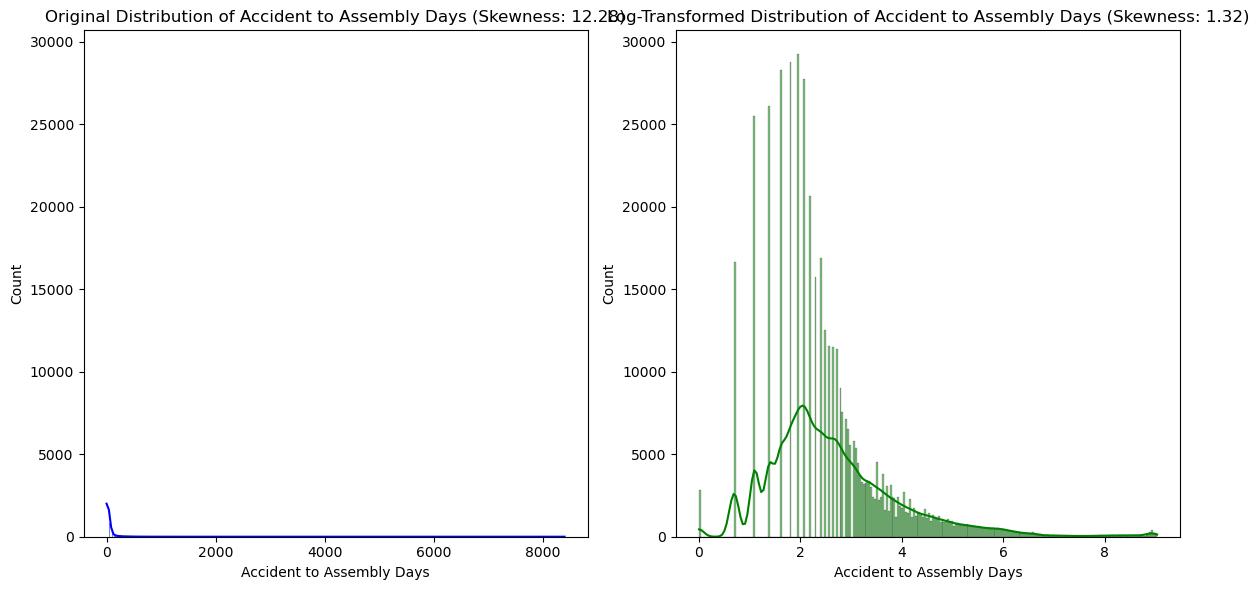

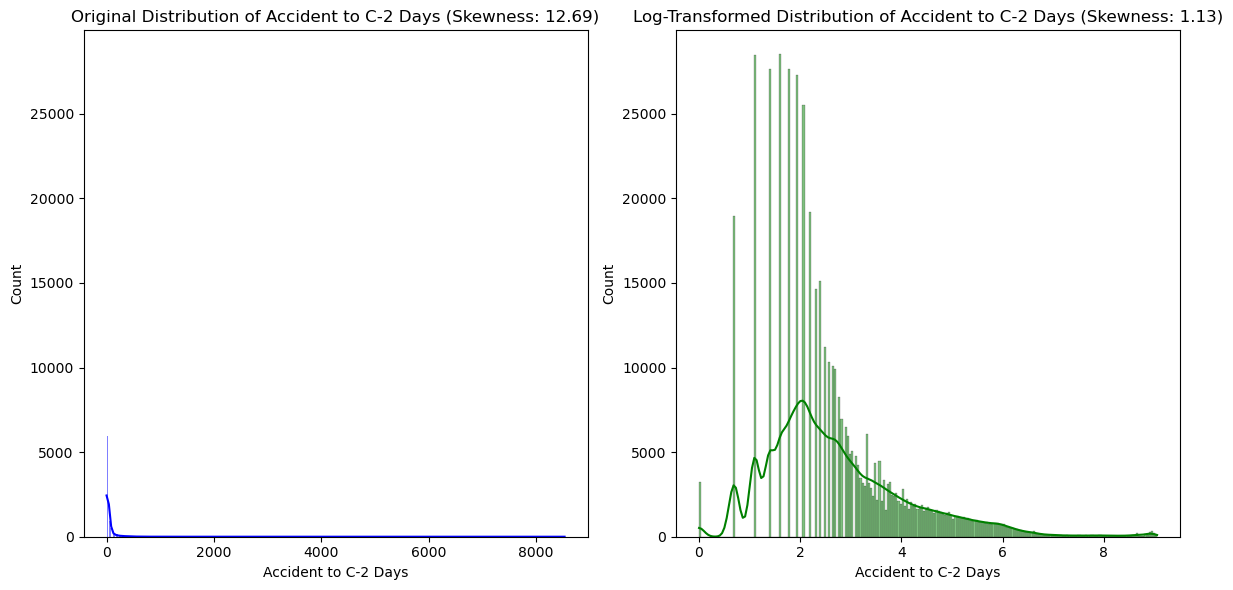

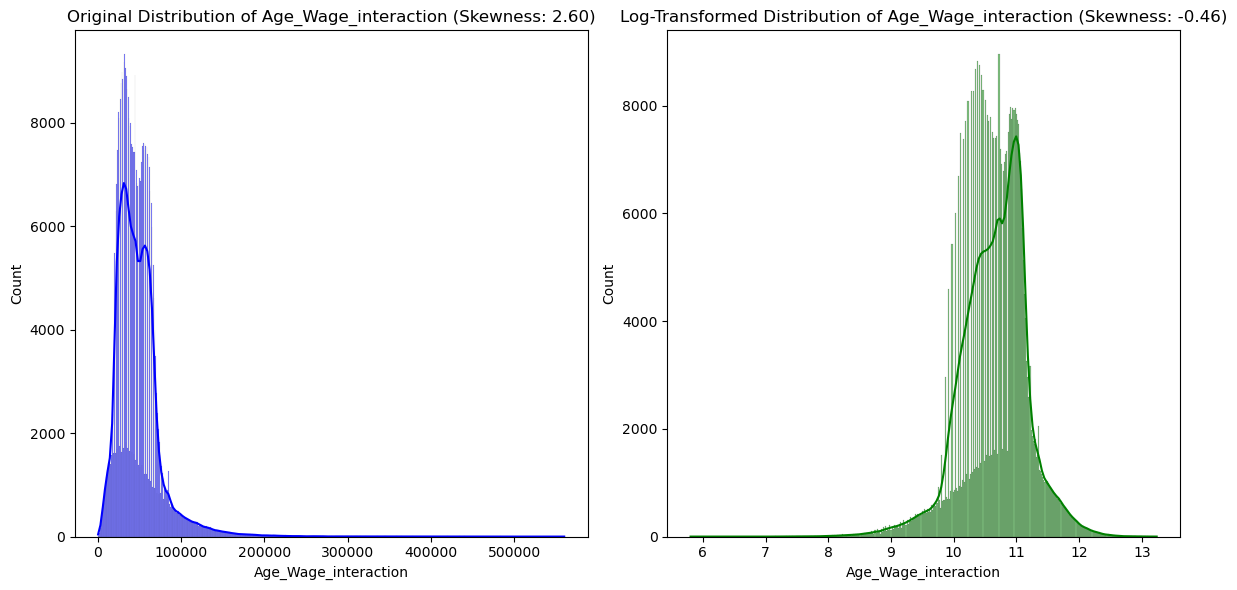

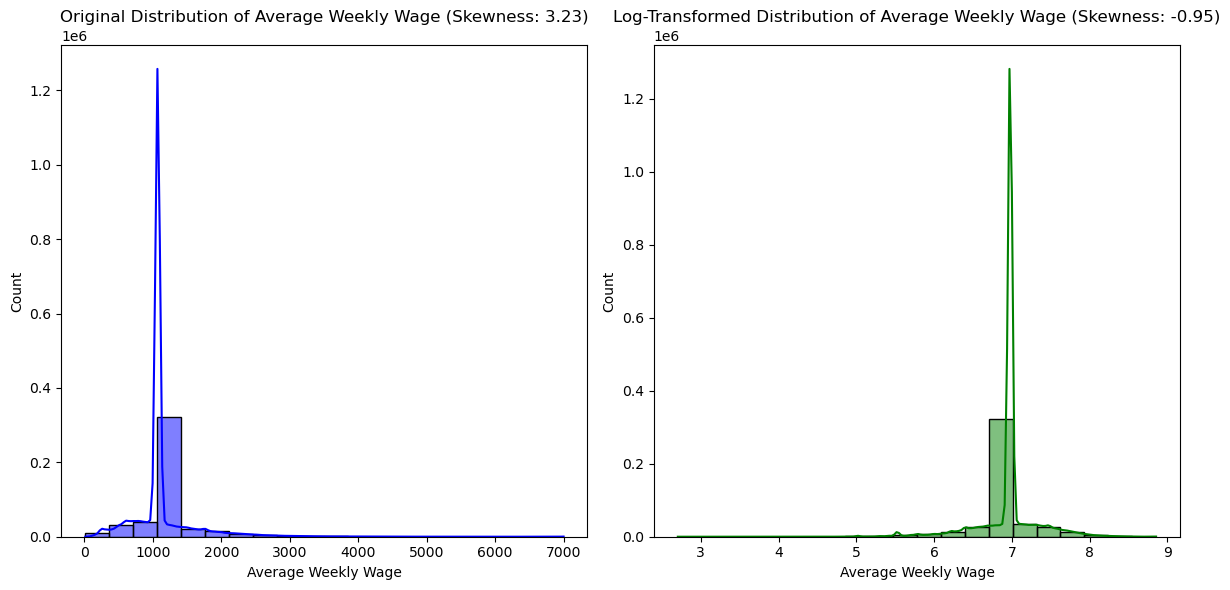

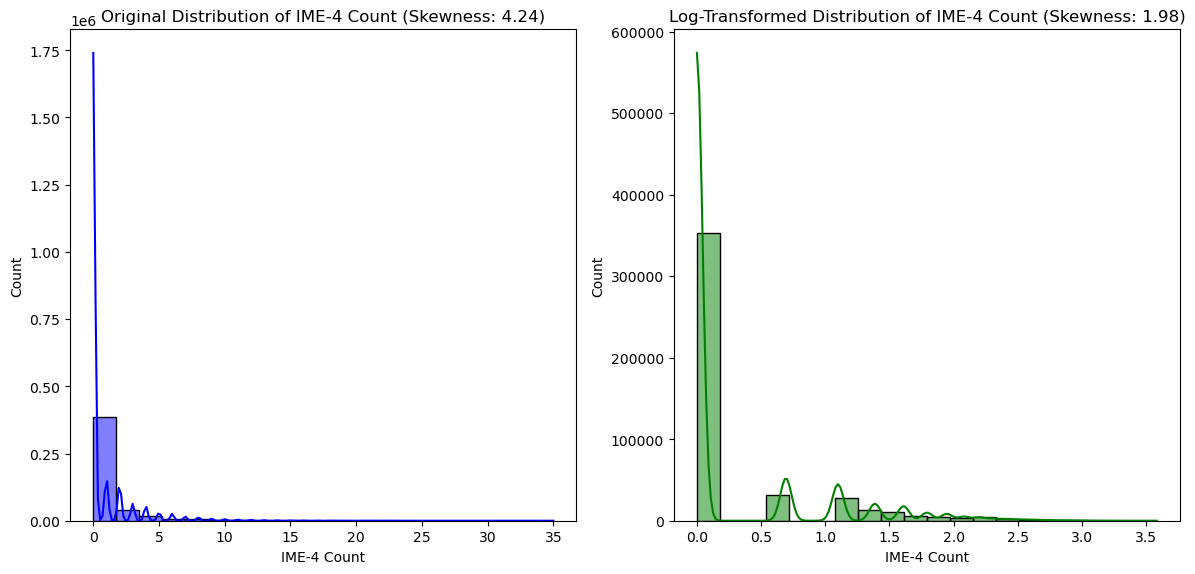

In [133]:
# Calculate the absolute skewness before and after transformation
skewness_before_abs = skewness_before.abs()
skewness_after_abs = skewness_after.abs()

# Identify features with a significant reduction in skewness (change > threshold of 0.5)
skewness_difference = skewness_before_abs - skewness_after_abs
significant_skewed_features = skewness_difference[skewness_difference > 0.5].index

# Visualize only features with significant reductions in absolute skewness
for feature in significant_skewed_features:
    plt.figure(figsize=(12, 6))
    
    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[feature], kde=True, color='blue')
    plt.title(f"Original Distribution of {feature} (Skewness: {skewness_before[feature]:.2f})")

    # Transformed distribution
    plt.subplot(1, 2, 2)
    sns.histplot(train_data_log_transformed[feature], kde=True, color='green')
    plt.title(f"Log-Transformed Distribution of {feature} (Skewness: {skewness_after[feature]:.2f})")

    plt.tight_layout()
    plt.show()


Based on the plots above, all features except for IME-4 Count appear to be significantly more normalized under a logarithmic transformation. We will transform these features on a copy of the dataset, so that we can test our models with and without the log-transformed features.

In [135]:
#checking to see if there are any values of 0 in the features we are going to transform - train data
print(len(X_train[X_train['Average Weekly Wage'] == 0]))

0


In [136]:
print(len(X_train[X_train['Age_Wage_interaction'] == 0]))

0


In [137]:
print(len(X_train[X_train['Accident to Assembly Days'] == 0]))

2838


In [138]:
print(len(X_train[X_train['Accident to C-2 Days'] == 0]))

3209


In [139]:
#creating log copies of the dataframes
X_train_log = X_train.copy()
X_val_log = X_val.copy()
df_test_fe_log = df_test_fe.copy()

In [140]:
#transforming the features in all dataframes
#we will add a small epsilon (defined previously) to the features that have values of 0

#train
X_train_log['Log Average Weekly Wage'] = np.log1p(X_train_log['Average Weekly Wage'])
X_train_log['Log Age_Wage_interaction'] = np.log1p(X_train_log['Age_Wage_interaction'])
X_train_log['Log Accident to Assembly Days'] = np.log1p(X_train_log['Accident to Assembly Days'] + epsilon)
X_train_log['Log Accident to C-2 Days'] = np.log1p(X_train_log['Accident to C-2 Days'] + epsilon)


#validation
X_val_log['Log Average Weekly Wage'] = np.log1p(X_val_log['Average Weekly Wage'])
X_val_log['Log Age_Wage_interaction'] = np.log1p(X_val_log['Age_Wage_interaction'])
X_val_log['Log Accident to Assembly Days'] = np.log1p(X_val_log['Accident to Assembly Days'] + epsilon)
X_val_log['Log Accident to C-2 Days'] = np.log1p(X_val_log['Accident to C-2 Days'] + epsilon)


#test
df_test_fe_log['Log Average Weekly Wage'] = np.log1p(df_test_fe_log['Average Weekly Wage'])
df_test_fe_log['Log Age_Wage_interaction'] = np.log1p(df_test_fe_log['Age_Wage_interaction'])
df_test_fe_log['Log Accident to Assembly Days'] = np.log1p(df_test_fe_log['Accident to Assembly Days'] + epsilon)
df_test_fe_log['Log Accident to C-2 Days'] = np.log1p(df_test_fe_log['Accident to C-2 Days'] + epsilon)

In [141]:
#dropping the original features from each log df
X_train_log.drop(columns = ['Average Weekly Wage', 'Age_Wage_interaction', 'Accident to Assembly Days', 'Accident to C-2 Days'], axis = 1, inplace = True)
X_val_log.drop(columns = ['Average Weekly Wage', 'Age_Wage_interaction', 'Accident to Assembly Days', 'Accident to C-2 Days'], axis = 1, inplace = True)
df_test_fe_log.drop(columns = ['Average Weekly Wage', 'Age_Wage_interaction', 'Accident to Assembly Days', 'Accident to C-2 Days'], axis = 1, inplace = True)

In [142]:
X_train_log.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Age Group,Accident Season,Accident Date_IsWeekend,Accident Date in Days,Assembly Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Age_Wage_interaction,Log Accident to Assembly Days,Log Accident to C-2 Days
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5785935,2021-08-05,49.0,0,2021-08-10,1,1971.0,2021-08-10,1,PROPERTY AND CASUALTY,1A. PRIVATE,...,Senior,Summer,0,21883,21888,21888,6.613465,10.503969,1.791760,1.791760
6090033,2022-09-14,56.0,0,2022-09-21,1,1966.0,2022-09-21,1,EVEREST PREMIER INSURANCE,1A. PRIVATE,...,Senior,Fall,0,22288,22295,22295,6.740862,10.765053,2.079442,2.079442
6136197,2022-11-07,48.0,0,2022-11-18,0,1974.0,2022-11-18,0,CHARTER OAK FIRE INS CO,1A. PRIVATE,...,Senior,Fall,0,22342,22353,22353,6.976460,10.846747,2.484907,2.484907
6019545,2020-09-02,55.0,0,2022-06-21,0,1965.0,2022-06-21,1,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,...,Senior,Fall,0,21546,22203,22203,6.976460,10.982876,6.489205,6.489205
5792247,2021-08-13,53.0,0,2021-08-18,1,1968.0,2021-08-18,1,STATE INSURANCE FUND,2A. SIF,...,Senior,Summer,0,21891,21896,21896,6.505904,10.474728,1.791760,1.791760


In [143]:
X_val_log.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Age Group,Accident Season,Accident Date_IsWeekend,Accident Date in Days,Assembly Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Age_Wage_interaction,Log Accident to Assembly Days,Log Accident to C-2 Days
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5947783,2022-03-14,51.0,0,2022-03-22,0,1970.0,2022-03-22,1,CANTON CENTRAL SCHOOL DISTRICT,3A. SELF PUBLIC,...,Senior,Spring,0,22104,22112,22112,6.976460,10.907370,2.197225,2.197225
6150876,2022-12-02,61.0,0,2022-12-09,1,1961.0,2022-12-09,0,STATE INSURANCE FUND,2A. SIF,...,Senior,Winter,0,22367,22374,22374,6.976460,11.086415,2.079442,2.079442
5397365,2011-06-14,50.0,0,2020-01-08,1,1961.0,2020-01-07,0,COMMERCE AND INDUSTRY INS CO,1A. PRIVATE,...,Senior,Summer,0,18178,21308,21307,6.976460,10.887568,8.049108,8.048788
6077399,2022-02-07,54.0,0,2022-09-07,1,1967.0,2022-09-13,1,STATE INSURANCE FUND,2A. SIF,...,Senior,Winter,0,22069,22281,22287,7.315551,11.303882,5.361292,5.389072
5945251,2022-03-15,35.0,0,2022-03-16,0,1986.0,2022-03-16,0,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,...,Adult,Spring,0,22105,22106,22106,6.976460,10.530901,0.693148,0.693148


In [144]:
df_test_fe_log.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Age Group,Accident Season,Accident Date_IsWeekend,Accident Date in Days,Assembly Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Age_Wage_interaction,Log Accident to Assembly Days,Log Accident to C-2 Days
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,0,2023-01-02,0,2003.0,2023-01-02,0,INDEMNITY INSURANCE CO OF,1A. PRIVATE,...,Teen,Winter,1,22389,22398,22398,6.97646,9.920014,2.302585,2.302585
6166141,2022-11-20,19,0,2023-01-02,0,2003.0,2023-01-02,0,A I U INSURANCE COMPANY,1A. PRIVATE,...,Teen,Fall,1,22355,22398,22398,6.97646,9.920014,3.784190,3.784190
6165907,2022-12-26,59,0,2023-01-02,0,1963.0,2022-12-31,0,AMGUARD INSURANCE COMPANY,1A. PRIVATE,...,Senior,Winter,0,22391,22398,22396,6.97646,11.053079,2.079442,1.791760
6166047,2022-12-28,55,0,2023-01-02,0,1967.0,2023-01-02,0,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,...,Senior,Winter,0,22393,22398,22398,6.97646,10.982876,1.791760,1.791760
6166102,2022-12-20,25,0,2023-01-02,0,1997.0,2022-12-31,0,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,...,Teen,Winter,0,22385,22398,22396,6.97646,10.194439,2.639057,2.484907


<hr>
<div class="alert alert-block alert-info" style="font-size:12px" id="export">
    
# 3.5 CSV Formatting, Exports
 
</a>

In [146]:
#checking the shape of X_train, X_val, y_train, y_val to make sure they match
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print('df_test_fe shape:', df_test_fe.shape)

X_train shape: (459181, 36)
y_train shape: (459181,)
X_val shape: (114796, 36)
y_val shape: (114796,)
df_test_fe shape: (387975, 36)


In [147]:
#checking the shape of X_train, X_val, y_train, y_val to make sure they match
print("X_train_log shape:", X_train_log.shape)
print("y_train_log shape:", y_train.shape)
print("X_val_log shape:", X_val_log.shape)
print("y_val_log shape:", y_val.shape)
print('df_test_fe_log shape:', df_test_fe_log.shape)

X_train_log shape: (459181, 36)
y_train_log shape: (459181,)
X_val_log shape: (114796, 36)
y_val_log shape: (114796,)
df_test_fe_log shape: (387975, 36)


In [148]:
#rejoining X and y to ensure indices are still matched when we re-import
# Horizontal stacking (columns)
df_train_fe = pd.concat([X_train, y_train], axis=1)
df_train_fe.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Accident to Assembly Days,Accident to C-2 Days,Age Group,Accident Season,Accident Date_IsWeekend,Age_Wage_interaction,Accident Date in Days,Assembly Date in Days,C-2 Date in Days,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5785935,2021-08-05,49.0,0,2021-08-10,1,744.06,1971.0,2021-08-10,1,PROPERTY AND CASUALTY,...,5,5,Senior,Summer,0,36458.94,21883,21888,21888,4
6090033,2022-09-14,56.0,0,2022-09-21,1,845.29,1966.0,2022-09-21,1,EVEREST PREMIER INSURANCE,...,7,7,Senior,Fall,0,47336.24,22288,22295,22295,3
6136197,2022-11-07,48.0,0,2022-11-18,0,1070.12,1974.0,2022-11-18,0,CHARTER OAK FIRE INS CO,...,11,11,Senior,Fall,0,51365.76,22342,22353,22353,2
6019545,2020-09-02,55.0,0,2022-06-21,0,1070.12,1965.0,2022-06-21,1,NEW HAMPSHIRE INSURANCE CO,...,657,657,Senior,Fall,0,58856.60,21546,22203,22203,2
5792247,2021-08-13,53.0,0,2021-08-18,1,668.08,1968.0,2021-08-18,1,STATE INSURANCE FUND,...,5,5,Senior,Summer,0,35408.24,21891,21896,21896,3


In [149]:
#for log train data
df_train_fe_log = pd.concat([X_train_log, y_train], axis=1)
df_train_fe_log.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Accident Season,Accident Date_IsWeekend,Accident Date in Days,Assembly Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Age_Wage_interaction,Log Accident to Assembly Days,Log Accident to C-2 Days,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5785935,2021-08-05,49.0,0,2021-08-10,1,1971.0,2021-08-10,1,PROPERTY AND CASUALTY,1A. PRIVATE,...,Summer,0,21883,21888,21888,6.613465,10.503969,1.791760,1.791760,4
6090033,2022-09-14,56.0,0,2022-09-21,1,1966.0,2022-09-21,1,EVEREST PREMIER INSURANCE,1A. PRIVATE,...,Fall,0,22288,22295,22295,6.740862,10.765053,2.079442,2.079442,3
6136197,2022-11-07,48.0,0,2022-11-18,0,1974.0,2022-11-18,0,CHARTER OAK FIRE INS CO,1A. PRIVATE,...,Fall,0,22342,22353,22353,6.976460,10.846747,2.484907,2.484907,2
6019545,2020-09-02,55.0,0,2022-06-21,0,1965.0,2022-06-21,1,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,...,Fall,0,21546,22203,22203,6.976460,10.982876,6.489205,6.489205,2
5792247,2021-08-13,53.0,0,2021-08-18,1,1968.0,2021-08-18,1,STATE INSURANCE FUND,2A. SIF,...,Summer,0,21891,21896,21896,6.505904,10.474728,1.791760,1.791760,3


In [150]:
#for validation data
df_val_fe = pd.concat([X_val, y_val], axis=1)
df_val_fe.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Accident to Assembly Days,Accident to C-2 Days,Age Group,Accident Season,Accident Date_IsWeekend,Age_Wage_interaction,Accident Date in Days,Assembly Date in Days,C-2 Date in Days,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5947783,2022-03-14,51.0,0,2022-03-22,0,1070.12,1970.0,2022-03-22,1,CANTON CENTRAL SCHOOL DISTRICT,...,8,8,Senior,Spring,0,54576.12,22104,22112,22112,3
6150876,2022-12-02,61.0,0,2022-12-09,1,1070.12,1961.0,2022-12-09,0,STATE INSURANCE FUND,...,7,7,Senior,Winter,0,65277.32,22367,22374,22374,4
5397365,2011-06-14,50.0,0,2020-01-08,1,1070.12,1961.0,2020-01-07,0,COMMERCE AND INDUSTRY INS CO,...,3130,3129,Senior,Summer,0,53506.00,18178,21308,21307,4
6077399,2022-02-07,54.0,0,2022-09-07,1,1502.50,1967.0,2022-09-13,1,STATE INSURANCE FUND,...,212,218,Senior,Winter,0,81135.00,22069,22281,22287,5
5945251,2022-03-15,35.0,0,2022-03-16,0,1070.12,1986.0,2022-03-16,0,SAFETY NATIONAL CASUALTY CORP,...,1,1,Adult,Spring,0,37454.20,22105,22106,22106,2


In [151]:
#for validation log data
df_val_fe_log = pd.concat([X_val_log, y_val], axis=1)
df_val_fe_log.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Accident Season,Accident Date_IsWeekend,Accident Date in Days,Assembly Date in Days,C-2 Date in Days,Log Average Weekly Wage,Log Age_Wage_interaction,Log Accident to Assembly Days,Log Accident to C-2 Days,Claim Injury Type
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5947783,2022-03-14,51.0,0,2022-03-22,0,1970.0,2022-03-22,1,CANTON CENTRAL SCHOOL DISTRICT,3A. SELF PUBLIC,...,Spring,0,22104,22112,22112,6.976460,10.907370,2.197225,2.197225,3
6150876,2022-12-02,61.0,0,2022-12-09,1,1961.0,2022-12-09,0,STATE INSURANCE FUND,2A. SIF,...,Winter,0,22367,22374,22374,6.976460,11.086415,2.079442,2.079442,4
5397365,2011-06-14,50.0,0,2020-01-08,1,1961.0,2020-01-07,0,COMMERCE AND INDUSTRY INS CO,1A. PRIVATE,...,Summer,0,18178,21308,21307,6.976460,10.887568,8.049108,8.048788,4
6077399,2022-02-07,54.0,0,2022-09-07,1,1967.0,2022-09-13,1,STATE INSURANCE FUND,2A. SIF,...,Winter,0,22069,22281,22287,7.315551,11.303882,5.361292,5.389072,5
5945251,2022-03-15,35.0,0,2022-03-16,0,1986.0,2022-03-16,0,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,...,Spring,0,22105,22106,22106,6.976460,10.530901,0.693148,0.693148,2


In [152]:
print('Train Data Shape:', df_train_fe.shape)
print('Validation Data Shape:', df_val_fe.shape)
print('Test Data Shape:', df_test_fe.shape)

Train Data Shape: (459181, 37)
Validation Data Shape: (114796, 37)
Test Data Shape: (387975, 36)


In [153]:
print('Log Train Data Shape:', df_train_fe_log.shape)
print('Log Validation Data Shape:', df_val_fe_log.shape)
print('Log Test Data Shape:', df_test_fe_log.shape)

Log Train Data Shape: (459181, 37)
Log Validation Data Shape: (114796, 37)
Log Test Data Shape: (387975, 36)


In [154]:
#original dfs
df_train_fe.to_csv('df_train_fe.csv', index = True)
df_val_fe.to_csv('df_val_fe.csv', index = True)
df_test_fe.to_csv('df_test_fe.csv', index = True)

#log dfs
df_train_fe_log.to_csv('df_train_fe_log.csv', index = True)
df_val_fe_log.to_csv('df_val_fe_log.csv', index = True)
df_test_fe_log.to_csv('df_test_fe_log.csv', index = True)
